## Any Changes
Our goal was to "analyse and forecast the energy usage in an urban city". Since the previous milestone there has not been a change in the goal.

## Data
The source of the data is the following link: [LINK](https://data.world/houston/houston-electricity-bills)

There are 4 files, they are:
1. July 2011 to June 2012 excel file - 57,430 rows and 24 columns
2. May 2012 to April 2013 excel file - 65,806 rows and 24 columns
3. July 2012 to June 2013 excel file - 66,776 rows and 24 columns
4. July 2013 to June 2014 excel file - 67,838 rows and 24 columns

The data tables contain information regarding the building address, location, service number, billing dates, total amount due. 

The plan is to go through and clean the data tables individually and make them consistent. Once that is done the next step is to merge the cleaned data tables. After merging the tables one important check is to search for duplicates since there is an overlap of dates it is highly likely that there will be duplicates.

Description of each column 
1. Reliant Contract No: A unique identifier for each contract. 
2. Service Address: Address for the service location
3. Meter No: Meter number for the service location.
4. ESID: Electric Service Identifier for the service location.
5. Business Area: Business area code for the service location.
6. Cost Center: Cost center code for the service location.
7. Fund: Fund code for the service location.
8. Bill Type: Type of bill (e.g. "T" for "Total", "P" for "Partial", etc.). 
9. Bill Date: Date the bill was generated. 
10. Read Date: Date the meter was read. 
11. Due Date: Due date for the bill. 
12. Meter Read: Meter reading for the service location. 
13. Base Cost: TBase cost for the service. 
14. T&D Discretionary: Transmission and Distribution Discretionary charge for the service. 
15. T&D Charges: Transmission and Distribution charge for the service. 
16. Current Due: Current due amount for the service.
17. Index Charge: Index charge for the service. 
18. Total Due: Total due amount for the service. 
19. Franchise Fee: Franchise fee for the service. 
20. Voucher Date: Date the voucher was issued for the service. 
21. Billed Demand: Billed demand for the service in KVA. 
22. kWh Usage: Kilowatt-hour usage for the service. 
23. Nodal Cu Charge:  Nodal Cu Charge for the service. 
24. Adder Charge:  Adder Charge for the service.

Statistical Data Type of Each Column 
1. Reliant Contract No: integer (ratio)
2. Service Address: string (nominal)
3. Meter No: integer (nominal)
4. ESID: integer (nominal)
5. Business Area: integer (ratio))
6. Cost Center: integer (ratio)
7. Fund: integer (ratio)
8. Bill Type: string (nominal)
9. Bill Date: date (nominal)
10. Read Date: date (nominal)
11. Due Date: date (nominal)
12. Meter Read: integer (ratio)
13. Base Cost: float (nominal)
14. T&D Discretionary: float (nominal)
15. T&D Charges: float (nominal)
16. Current Due: float (nominal)
17. Index Charge: float (nominal)
18. Total Due: float (nominal)
19. Franchise Fee: float (nominal)
20. Voucher Date: date (nominal)
21. Billed Demand (KVA): integer (nominal)
22. kWh Usage: integer (nominal)
23. Nodal Cu Charge: float (nominal)
24. Adder Charge: float (nominal)

## Problem
The key issue in generating electricity is to determine how much capacity to generate in order to meet future demand. 

Electricity usage forecasting involves predicting the demand for electricity over a specific eriod. This process has several uses, including energy procurement, where it helps suppliers purchase the right amount of energy to ensure a steady supply.

The advancement of smart infrastructure and integration of distributed renewable power has raised future supply, demand, and pricing uncertainties. This unpredictability has increased interest in price prediction and energy analysis.

## Research Questions
1. Previous electricity usage data can be used for predicting the usage for future (Time-Series) - Hyndavi 
2. Group areas based on their energy consumption (Clustering) - Sunil
3. Electricity usage can be predicted by using correlated features (Regression) - Sourabh
4. Classification of bill type can be done using features in the data (Classification) - Sharmisha

## Import Statements

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from scipy import stats

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score, f1_score
import requests,urllib,os,pickle
from tqdm import tqdm

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans, DBSCAN,AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
from IPython import display

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from tqdm import tqdm_notebook
from itertools import product
import math 
from statistics import mean
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.preprocessing.sequence import TimeseriesGenerator

pd.options.display.max_columns=25

import warnings
warnings.filterwarnings('ignore')

## Data FY 2012 - Hyndavi

In [ ]:
data_2012 = pd.read_excel(
'houston-houston-electricity-bills/coh-fy2012-ee-bills-july2011-june2012.xls'
)
orig_shape_2012 = data_2012.shape[0]

data_2012.shape

(57430, 24)

In [ ]:
data_2012.head(5)

Reliant Contract No Service Address  Meter No                    ESID  \
0              2059605   10518 BELLAIRE   303261  1008901000140050014100   
1              2059605   10518 BELLAIRE   303261  1008901000140050014100   
2              2059605   10518 BELLAIRE   303261  1008901000140050014100   
3              2059605   10518 BELLAIRE   303261  1008901000140050014100   
4              2059605   10518 BELLAIRE   303261  1008901000140050014100   

   Business Area  Cost Center  Fund Bill Type  Bill Date  Read Date  \
0           2000   2000040005  8300         T 2012-06-26 2012-06-21   
1           2000   2000040005  8300         T 2012-05-25 2012-05-21   
2           2000   2000040005  8300         T 2012-04-27 2012-04-23   
3           2000   2000040005  8300         T 2012-03-27 2012-03-21   
4           2000   2000040005  8300         T 2012-02-27 2012-02-21   

    Due Date  Meter Read  Base Cost ($)  T&D Discretionary ($)  \
0 2012-07-26     47940.0       61070.65                1638.01   
1 2012-06-24     47186.0       56319.47                1631.00   
2 2012-05-27     46499.0       68461.63                1674.67   
3 2012-04-26     45684.0       62036.29                1696.66   
4 2012-03-28     44954.0       61670.24                1703.80   

   T&D Charges ($)  Current Due ($)  Adjustment ($)  Total Due ($)  \
0         10440.86         73232.11             NaN       73232.11   
1         10364.63         68463.46             NaN       68463.46   
2         10676.79         80847.87             NaN       80847.87   
3         10681.48         74373.93             NaN       74373.93   
4         10707.94         74080.27             NaN       74080.27   

   Franchise Fee ($) Voucher Date  Billed Demand   kWh Usage  \
0           -1047.28   2012-06-27     1507.291667     905421   
1           -1045.21   2012-05-30     1496.907217     824107   
2           -1081.11   2012-04-30     1562.500000     977744   
3           -1087.32   2012-03-28     1567.708333     876838   
4           -1090.08   2012-02-28     1577.083333     872898   

   Nodal Cu Charge ($)  Reliability Unit Charge ($)  
0                82.59                          0.0  
1               148.36                          0.0  
2                34.78                          0.0  
3               -40.50                          0.0  
4                -1.71                          0.0

### Checking Nulls

In [ ]:
data_2012.isna().sum()

Reliant Contract No                0
Service Address                    0
Meter No                        7809
ESID                               0
Business Area                      0
Cost Center                        0
Fund                               0
Bill Type                          0
Bill Date                          0
Read Date                          0
Due Date                           0
Meter Read                         2
Base Cost ($)                      0
T&D Discretionary ($)              0
T&D Charges ($)                    0
Current Due ($)                    0
Adjustment ($)                 56259
Total Due ($)                      0
Franchise Fee ($)                  0
Voucher Date                       0
Billed Demand                      3
kWh Usage                          0
Nodal Cu Charge ($)                1
Reliability Unit Charge ($)        4
dtype: int64

### Checking Adjustment ($) column

In [ ]:
data_2012['Adjustment ($)'].value_counts(dropna=False)

NaN       56259
0.0        1170
9425.9        1
Name: Adjustment ($), dtype: int64

The column does not have any relevant information based on the above reported values. Electing to drop the column.

In [ ]:
data_2012.drop(columns=['Adjustment ($)'], inplace=True)

### Checking Unique Number of Customers

There are quite a few columns in the dataset that signify relating to a unique person/house/business. Checking the unique counts of such columns.

In [ ]:
check_unique_columns = ['Reliant Contract No', 'Service Address ', 'Meter No', 
                        'ESID', 'Business Area', 'Cost Center',]

for col in check_unique_columns:
    print(f'Number of Unique Values in {col}: {data_2012[col].nunique()}')

Number of Unique Values in Reliant Contract No: 5241
Number of Unique Values in Service Address : 5183
Number of Unique Values in Meter No: 4021
Number of Unique Values in ESID: 5241
Number of Unique Values in Business Area: 9
Number of Unique Values in Cost Center: 38


Based on the above reported values and further research online:

ESID signifies a unique ID provided to each customer subscribed to the electricity board. It would be best to choose ESID and Service Address columns going forward as these would provide number of unique customers and the areas (streets) where higher usage of electricity occurs.

Business Area signifies a grouping a number of buildings which covers a certain area. This would be useful usage patterns grouped by certain zones in the city.

### Checking Bill Type

In [ ]:
data_2012['Bill Type'].value_counts(dropna=False)

T    56859
P      552
C       19
Name: Bill Type, dtype: int64

Bill Type could signify the type of the connection given. Since commercial, residential and government spaces would have different type of pricing and needs this column could be capturing that information.

In [ ]:
(
    data_2012['Service Address '].nunique(), 
    data_2012['Meter No'].nunique(), 
    data_2012['ESID'].nunique()
)

(5183, 4021, 5241)

The next 3 columns are: Bill Date, Read Date and Due Date. Of these it would be best to choose the Bill date across all the data files to keep the data consistent. 

### Electricity Usage Statistics

In [ ]:
data_2012[['Meter Read', 'Billed Demand ', 'kWh Usage']].describe()

Meter Read  Billed Demand      kWh Usage
count   57428.000000    57427.000000  5.743000e+04
mean    10008.024135       52.581303  2.249732e+04
std     19208.052944      432.027165  2.216349e+05
min         0.000000        0.000000  0.000000e+00
25%       118.750000        0.000000  1.000000e+02
50%      2583.000000        0.000000  2.980000e+02
75%      7879.000000       11.000000  2.240000e+03
max    342348.000000    18495.555556  1.069344e+07

There are 3 columns that denote the amount of electricity: Meter Read, Billed Demand, kWh Usage.

Using kWh Usage as a standard unit of measurement.

In [ ]:
data_2012[[
    'Base Cost ($)', 'T&D Discretionary ($)', 'T&D Charges ($)', 
    'Current Due ($)', 'Total Due ($)', 'Franchise Fee ($)', 
    'Nodal Cu Charge ($)', 'Reliability Unit Charge ($)'
     ]].describe()

Base Cost ($)  T&D Discretionary ($)  T&D Charges ($)  Current Due ($)  \
count   57430.000000           57430.000000     57430.000000     57430.000000   
mean     1557.590034             404.377159       322.324780      2292.520167   
std     15332.140262           12617.605024      2103.325682     23457.157709   
min         0.000000             -44.990000      -680.340000       -64.210000   
25%         6.870000               3.240000         7.380000        18.650000   
50%        20.590000               3.910000        12.440000        38.240000   
75%       155.252500              17.070000        98.847500       312.610000   
max    740473.960000          754326.010000     64282.330000    907483.660000   

       Total Due ($)  Franchise Fee ($)  Nodal Cu Charge ($)  \
count   57430.000000       57430.000000         57429.000000   
mean     2326.005266         -36.249975             8.067123   
std     23484.415824         255.356787           136.268511   
min         0.000000       -9352.010000          -367.210000   
25%        18.430000          -5.740000             0.000000   
50%        38.490000          -0.500000             0.010000   
75%       317.212500           0.000000             0.280000   
max    907483.660000           0.000000         18019.450000   

       Reliability Unit Charge ($)  
count                      57426.0  
mean                           0.0  
std                            0.0  
min                            0.0  
25%                            0.0  
50%                            0.0  
75%                            0.0  
max                            0.0

Reliability Unit Charge does not contain any useful information. Electing to drop that column.

The columns other than Current Due or Total Due are adding up the value present in these two columns. Going forward choosing the column Total Due ($). 
Based on the above statistics the columns Current Due and Total Due represent the same value. 

### Selecting and Filtering Columns

In [ ]:
data_2012.columns

Index(['Reliant Contract No', 'Service Address ', 'Meter No', 'ESID',
       'Business Area', 'Cost Center', 'Fund', 'Bill Type', 'Bill Date',
       'Read Date', 'Due Date', 'Meter Read', 'Base Cost ($)',
       'T&D Discretionary ($)', 'T&D Charges ($)', 'Current Due ($)',
       'Total Due ($)', 'Franchise Fee ($)', 'Voucher Date', 'Billed Demand ',
       'kWh Usage', 'Nodal Cu Charge ($)', 'Reliability Unit Charge ($)'],
      dtype='object')

Based on the above analysis of the dataset choosing the following columns:

1. ESID
2. Business Area
3. Service Address 
3. Bill Type
4. Bill Date
5. Total Due ($)
6. kWh Usage

In [ ]:
data_2012 = data_2012[[
    'ESID', 'Business Area', 'Service Address ', 'Bill Type',
    'Bill Date', 'Total Due ($)', 'kWh Usage'
]]

In [ ]:
rename_cols = {
    'ESID': 'esid',
    'Business Area': 'business_area',
    'Service Address ': 'service_address',
    'Bill Type': 'bill_type',
    'Bill Date': 'bill_date',
    'Total Due ($)': 'total_due',
    'kWh Usage': 'kwh_usage'
}

data_2012_main = data_2012.rename(columns=rename_cols)

Checking for Nulls again and dtypes

In [ ]:
data_2012_main.isna().sum()

esid               0
business_area      0
service_address    0
bill_type          0
bill_date          0
total_due          0
kwh_usage          0
dtype: int64

In [ ]:
data_2012_main.dtypes

esid                       object
business_area               int64
service_address            object
bill_type                  object
bill_date          datetime64[ns]
total_due                 float64
kwh_usage                   int64
dtype: object

In [ ]:
data_2012_main.shape

(57430, 7)

In [ ]:
zscore_2012 = stats.zscore(data_2012_main[['total_due', 'kwh_usage']])

zscore_2012

total_due  kwh_usage
0       3.019310   3.983720
1       2.816252   3.616835
2       3.343602   4.310039
3       3.067930   3.854755
4       3.055426   3.836978
...          ...        ...
57425  -0.070053  -0.090029
57426  -0.070059  -0.090029
57427  -0.070064  -0.090029
57428  -0.070255  -0.090029
57429  -0.011686  -0.090029

[57430 rows x 2 columns]

Each zscore value signifies how many standard deviations away an individual value is from the mean. This is a good indicator to finding outliers in the dataframe.

Usually z-score=3 is considered as a cut-off value to set the limit. Therefore, any z-score greater than +3 or less than -3 is considered as outlier which is pretty much similar to standard deviation method

In [ ]:
# data_2012_main = data_2012_main[(np.abs(zscore_2012) < 3).all(axis=1)]

data_2012_main.shape

(57430, 7)

The number of rows has decreased from 57,430 to 57,025. So 405 rows were outliers based on the data.

In [ ]:
data_2012_main.head(5)

esid  business_area service_address bill_type  bill_date  \
0  1008901000140050014100           2000  10518 BELLAIRE         T 2012-06-26   
1  1008901000140050014100           2000  10518 BELLAIRE         T 2012-05-25   
2  1008901000140050014100           2000  10518 BELLAIRE         T 2012-04-27   
3  1008901000140050014100           2000  10518 BELLAIRE         T 2012-03-27   
4  1008901000140050014100           2000  10518 BELLAIRE         T 2012-02-27   

   total_due  kwh_usage  
0   73232.11     905421  
1   68463.46     824107  
2   80847.87     977744  
3   74373.93     876838  
4   74080.27     872898

In [ ]:
orig_shape_2012 - data_2012_main.shape[0]

0

In [ ]:
data_2012.to_csv('electricity_usage_data_2012.csv', index=False)

The trend graph of both the cost and energy usage is the same as the value of cost = energy usage times the cost per unit.

## Performing a Similar Analysis on FY 2013-1, FY 2013-2, and FY 2014 before merging datasets

## Data FY 2013-1 - Sunil

In [ ]:
data_2013 = pd.read_excel(
'houston-houston-electricity-bills/coh-fy2013-ee-bills-july2012-june2013.xlsx'
)
orig_shape_2013 = data_2013.shape[0]

data_2013.shape

(66776, 24)

In [ ]:
data_2013.head(5)

Reliant Contract No Service Address  Meter No                    ESID  \
0              2059605   10518 BELLAIRE   303261  1008901000140050014100   
1              2059605   10518 BELLAIRE   303261  1008901000140050014100   
2              2059605   10518 BELLAIRE   303261  1008901000140050014100   
3              2059605   10518 BELLAIRE   303261  1008901000140050014100   
4              2059605   10518 BELLAIRE   303261  1008901000140050014100   

   Business Area  Cost Center  Fund Bill Type  Bill Date  Read Date  \
0           2000   2000040005  8300         T 2013-06-27 2013-06-23   
1           2000   2000040005  8300         T 2013-05-29 2013-05-23   
2           2000   2000040005  8300         T 2013-04-29 2013-04-23   
3           2000   2000040005  8300         T 2013-03-28 2013-03-21   
4           2000   2000040005  8300         T 2013-02-26 2013-02-21   

    Due Date  Meter Read  Base Cost ($)  T&D Discretionary ($)  \
0 2013-07-28     57061.0       57621.95                1319.11   
1 2013-06-28     56331.0       57981.59                1316.35   
2 2013-05-29     55598.0       67005.80                1357.92   
3 2013-04-27     54767.0       57008.44                1300.83   
4 2013-03-28     54059.0       61287.57                1313.49   

   T&D Charges ($)  Current Due ($)  Index Charge ($)  Total Due ($)  \
0         10606.19         69785.20               NaN       69785.20   
1         10676.66         70177.01               NaN       70177.01   
2         10853.62         79309.40               NaN       79309.40   
3         10473.16         68778.30               NaN       68778.30   
4         10534.33         73135.18               NaN       73135.18   

   Franchise Fee ($) Voucher Date  Billed Demand (KVA)  kWh Usage  \
0           -1016.90   2013-07-01          1462.500000   876113.0   
1           -1041.76   2013-05-30          1496.907217   879842.0   
2           -1036.92   2013-04-30          1502.083333   997407.0   
3            -995.50   2013-03-29          1432.989691   849351.0   
4           -1000.33   2013-02-27          1452.577320   911746.0   

   Nodal Cu Charge ($)  Adder Charge ($)  
0               237.95               0.0  
1               202.41               0.0  
2                92.06               0.0  
3                -4.13               0.0  
4                -0.21               0.0

### Checking Nulls

In [ ]:
data_2013.isna().sum()

Reliant Contract No          0
Service Address              0
Meter No                 15228
ESID                         0
Business Area                0
Cost Center                  0
Fund                         0
Bill Type                    0
Bill Date                    0
Read Date                    0
Due Date                     0
Meter Read                  12
Base Cost ($)                1
T&D Discretionary ($)        0
T&D Charges ($)              1
Current Due ($)              0
Index Charge ($)         65183
Total Due ($)                0
Franchise Fee ($)            0
Voucher Date                 0
Billed Demand (KVA)         12
kWh Usage                    1
Nodal Cu Charge ($)          5
Adder Charge ($)            14
dtype: int64

### Checking Index Charge ($) column - This was previously Adjustment

In [ ]:
data_2013['Index Charge ($)'].value_counts(dropna=False)

 NaN     65183
 0.00     1592
-0.54        1
Name: Index Charge ($), dtype: int64

The column does not have any relevant information based on the above reported values. Electing to drop the column.

In [ ]:
data_2013.drop(columns=['Index Charge ($)'], inplace=True)

### Checking Unique Number of Customers

There are quite a few columns in the dataset that signify relating to a unique person/house/business. Checking the unique counts of such columns.

In [ ]:
check_unique_columns = ['Reliant Contract No', 'Service Address ', 'Meter No', 
                        'ESID', 'Business Area', 'Cost Center',]

for col in check_unique_columns:
    print(f'Number of Unique Values in {col}: {data_2013[col].nunique()}')

Number of Unique Values in Reliant Contract No: 5900
Number of Unique Values in Service Address : 5840
Number of Unique Values in Meter No: 4035
Number of Unique Values in ESID: 5898
Number of Unique Values in Business Area: 9
Number of Unique Values in Cost Center: 39


Based on the above reported values and further research online:

ESID signifies a unique ID provided to each customer subscribed to the electricity board. It would be best to choose ESID and Service Address columns going forward as these would provide number of unique customers and the areas (streets) where higher usage of electricity occurs.

Business Area signifies a grouping a number of buildings which covers a certain area. This would be useful usage patterns grouped by certain zones in the city.

### Checking Bill Type

In [ ]:
data_2013['Bill Type'].value_counts(dropna=False)

T    66222
P      552
C        2
Name: Bill Type, dtype: int64

Bill Type could signify the type of the connection given. Since commercial, residential and government spaces would have different type of pricing and needs this column could be capturing that information.

In [ ]:
(
    data_2013['Service Address '].nunique(), 
    data_2013['Meter No'].nunique(), 
    data_2013['ESID'].nunique()
)

(5840, 4035, 5898)

The next 3 columns are: Bill Date, Read Date and Due Date. Of these it would be best to choose the Bill date across all the data files to keep the data consistent. 

### Electricity Usage Statistics

In [ ]:
data_2013[['Meter Read', 'Billed Demand (KVA)', 'kWh Usage']].describe()

Meter Read  Billed Demand (KVA)     kWh Usage
count   66764.000000         66764.000000  6.677500e+04
mean     9869.779829            44.208272  1.880421e+04
std     17911.694906           380.343991  2.024587e+05
min         0.000000             0.000000  0.000000e+00
25%         0.000000             0.000000  1.000000e+00
50%      3123.000000             0.000000  2.310000e+02
75%      9007.250000             8.000000  1.680000e+03
max    239800.000000         16775.903614  9.689658e+06

There are 3 columns that denote the amount of electricity: Meter Read, Billed Demand, kWh Usage.

Using kWh Usage as a standard unit of measurement.

In [ ]:
data_2013[[
    'Base Cost ($)', 'T&D Discretionary ($)', 'T&D Charges ($)', 
    'Current Due ($)', 'Total Due ($)', 'Franchise Fee ($)', 
    'Nodal Cu Charge ($)', 'Adder Charge ($)'
     ]].describe()

Base Cost ($)  T&D Discretionary ($)  T&D Charges ($)  Current Due ($)  \
count   66775.000000           66776.000000     66775.000000     66776.000000   
mean     1249.628836             367.439382       278.533215      1901.861997   
std     13443.314342           11796.148872      1997.001709     21320.228167   
min         0.000000           -7091.410000    -37666.730000    -44264.860000   
25%         0.070000               3.120000         6.020000        11.820000   
50%        15.360000               6.200000        10.940000        32.170000   
75%       111.690000              20.730000        77.865000       234.010000   
max    650951.220000          756478.120000     69826.360000    907001.560000   

       Total Due ($)  Franchise Fee ($)  Nodal Cu Charge ($)  Adder Charge ($)  
count   66776.000000       66776.000000         66771.000000           66762.0  
mean     1902.580866         -33.921297             6.005230               0.0  
std     21320.836910         237.409585           132.671939               0.0  
min         0.000000       -7017.800000          -323.080000               0.0  
25%        11.820000          -5.410000             0.000000               0.0  
50%        32.040000          -0.460000             0.000000               0.0  
75%       230.737500           0.000000             0.150000               0.0  
max    907001.560000          84.910000         20461.930000               0.0

Adder Charge ($) does not contain any useful information. Electing to drop that column. Previously this column was Reliability Unit Charge.

The columns other than Current Due or Total Due are adding up the value present in these two columns. Going forward choosing the column Total Due ($). 
Based on the above statistics the columns Current Due and Total Due represent the same value. 

Based on the above analysis of the dataset choosing the following columns:

1. ESID
2. Business Area
3. Service Address 
3. Bill Type
4. Bill Date
5. Total Due ($)
6. kWh Usage

### Selecting and Filtering Columns

In [ ]:
data_2013 = data_2013[[
    'ESID', 'Business Area', 'Service Address ', 'Bill Type',
    'Bill Date', 'Total Due ($)', 'kWh Usage'
]]

In [ ]:
rename_cols = {
    'ESID': 'esid',
    'Business Area': 'business_area',
    'Service Address ': 'service_address',
    'Bill Type': 'bill_type',
    'Bill Date': 'bill_date',
    'Total Due ($)': 'total_due',
    'kWh Usage': 'kwh_usage'
}

data_2013_main = data_2013.rename(columns=rename_cols)

Checking for Nulls again and dtypes

In [ ]:
data_2013_main.isna().sum()

esid               0
business_area      0
service_address    0
bill_type          0
bill_date          0
total_due          0
kwh_usage          1
dtype: int64

In [ ]:
data_2013_main.dropna(subset=['kwh_usage'], inplace=True)

In [ ]:
data_2013_main.isna().sum()

esid               0
business_area      0
service_address    0
bill_type          0
bill_date          0
total_due          0
kwh_usage          0
dtype: int64

In [ ]:
data_2013_main.dtypes

esid                       object
business_area               int64
service_address            object
bill_type                  object
bill_date          datetime64[ns]
total_due                 float64
kwh_usage                 float64
dtype: object

In [ ]:
data_2013_main.shape

(66775, 7)

In [ ]:
zscore_2013 = stats.zscore(data_2013_main[['total_due', 'kwh_usage']])

zscore_2013

total_due  kwh_usage
0       3.183862   4.234519
1       3.202239   4.252938
2       3.630570   4.833629
3       3.136636   4.102333
4       3.340984   4.410522
...          ...        ...
66771  -0.057672  -0.080314
66772  -0.057229  -0.080314
66773  -0.057217  -0.080314
66774  -0.057477  -0.080314
66775  -0.056839  -0.080314

[66775 rows x 2 columns]

Each zscore value signifies how many standard deviations away an individual value is from the mean. This is a good indicator to finding outliers in the dataframe.

Usually z-score=3 is considered as a cut-off value to set the limit. Therefore, any z-score greater than +3 or less than -3 is considered as outlier which is pretty much similar to standard deviation method

In [ ]:
# data_2013_main = data_2013_main[(np.abs(zscore_2013) < 3).all(axis=1)]

data_2013_main.shape

(66775, 7)

The number of rows has decreased from 66,775 to 66,360. So 415 rows were outliers based on the data.

In [ ]:
data_2013_main.head(5)

esid  business_area service_address bill_type  bill_date  \
0  1008901000140050014100           2000  10518 BELLAIRE         T 2013-06-27   
1  1008901000140050014100           2000  10518 BELLAIRE         T 2013-05-29   
2  1008901000140050014100           2000  10518 BELLAIRE         T 2013-04-29   
3  1008901000140050014100           2000  10518 BELLAIRE         T 2013-03-28   
4  1008901000140050014100           2000  10518 BELLAIRE         T 2013-02-26   

   total_due  kwh_usage  
0   69785.20   876113.0  
1   70177.01   879842.0  
2   79309.40   997407.0  
3   68778.30   849351.0  
4   73135.18   911746.0

In [ ]:
orig_shape_2013 - data_2013_main.shape[0]

1

In [ ]:
data_2013_main.to_csv('electricity_usage_data_2013.csv', index=False)

## Data FY 2013-2 - Sourabh

In [ ]:
data_2013_2 = pd.read_excel(
'houston-houston-electricity-bills/coh-ee-bills-may2012-apr2013.xlsx'
)
orig_shape_2013_2 = data_2013_2.shape[0]

data_2013_2.shape

(65806, 24)

In [ ]:
data_2013_2.head(5)

Reliant Contract No Service Address  Meter No                    ESID  \
0              2059605   10518 BELLAIRE   303261  1008901000140050014100   
1              2059605   10518 BELLAIRE   303261  1008901000140050014100   
2              2059605   10518 BELLAIRE   303261  1008901000140050014100   
3              2059605   10518 BELLAIRE   303261  1008901000140050014100   
4              2059605   10518 BELLAIRE   303261  1008901000140050014100   

   Business Area  Cost Center  Fund Bill Type  Bill Date  Read Date  \
0           2000   2000040005  8300         T 2013-04-29 2013-04-23   
1           2000   2000040005  8300         T 2013-03-28 2013-03-21   
2           2000   2000040005  8300         T 2013-02-26 2013-02-21   
3           2000   2000040005  8300         T 2013-01-28 2013-01-22   
4           2000   2000040005  8300         T 2012-12-28 2012-12-20   

    Due Date  Meter Read  Base Cost ($)  T&D Discretionary ($)  \
0 2013-05-29     55598.0       67005.80                1357.92   
1 2013-04-27     54767.0       57008.44                1300.83   
2 2013-03-28     54059.0       61287.57                1313.49   
3 2013-02-27     53299.0       64657.23                1369.20   
4 2013-01-27     52491.0       60872.54                1612.61   

   T&D Charges ($)  Current Due ($)  Adjustment ($)  Total Due ($)  \
0         10853.62         79309.40             NaN       79309.40   
1         10473.16         68778.30             NaN       68778.30   
2         10534.33         73135.18             NaN       73135.18   
3         10878.65         77043.90             NaN       77043.90   
4         10928.60         73740.34             NaN       73740.34   

   Franchise Fee ($) Voucher Date  Billed Demand (KVA)  kWh Usage  \
0           -1036.92   2013-04-30          1502.083333   997407.0   
1            -995.50   2013-03-29          1432.989691   849351.0   
2           -1000.33   2013-02-27          1452.577320   911746.0   
3           -1048.66   2013-01-29          1498.969072   969810.0   
4           -1088.01   2012-12-31          1572.916667   927935.0   

   Nodal Cu Charge ($)  Reliability Unit Charge ($)  
0                92.06                          0.0  
1                -4.13                          0.0  
2                -0.21                          0.0  
3               138.82                          0.0  
4               326.59                          0.0

### Checking Nulls

In [ ]:
data_2013_2.isna().sum()

Reliant Contract No                0
Service Address                    0
Meter No                       14049
ESID                               0
Business Area                      0
Cost Center                        0
Fund                               0
Bill Type                          0
Bill Date                          0
Read Date                          0
Due Date                           0
Meter Read                        16
Base Cost ($)                      0
T&D Discretionary ($)              0
T&D Charges ($)                    0
Current Due ($)                    0
Adjustment ($)                 64229
Total Due ($)                      0
Franchise Fee ($)                  0
Voucher Date                       0
Billed Demand (KVA)               16
kWh Usage                          1
Nodal Cu Charge ($)                4
Reliability Unit Charge ($)       16
dtype: int64

### Checking Adjustment ($) column 

This column was named Index Charge in the other FY 2013 electricity usage data file

In [ ]:
data_2013_2['Adjustment ($)'].value_counts(dropna=False)

NaN       64229
0.0        1576
9425.9        1
Name: Adjustment ($), dtype: int64

The column does not have any relevant information based on the above reported values. Electing to drop the column.

In [ ]:
data_2013_2.drop(columns=['Adjustment ($)'], inplace=True)

### Checking Unique Number of Customers

There are quite a few columns in the dataset that signify relating to a unique person/house/business. Checking the unique counts of such columns.

In [ ]:
check_unique_columns = [
    'Reliant Contract No', 'Service Address ', 'Meter No', 
    'ESID', 'Business Area', 'Cost Center',
]

for col in check_unique_columns:
    print(f'Number of Unique Values in {col}: {data_2013_2[col].nunique()}')

Number of Unique Values in Reliant Contract No: 5786
Number of Unique Values in Service Address : 5725
Number of Unique Values in Meter No: 4035
Number of Unique Values in ESID: 5783
Number of Unique Values in Business Area: 9
Number of Unique Values in Cost Center: 39


Based on the above reported values and further research online:

ESID signifies a unique ID provided to each customer subscribed to the electricity board. It would be best to choose ESID and Service Address columns going forward as these would provide number of unique customers and the areas (streets) where higher usage of electricity occurs.

Business Area signifies a grouping a number of buildings which covers a certain area. This would be useful usage patterns grouped by certain zones in the city.

### Checking Bill Type

In [ ]:
data_2013_2['Bill Type'].value_counts(dropna=False)

T    65252
P      552
C        2
Name: Bill Type, dtype: int64

Bill Type could signify the type of the connection given. Since commercial, residential and government spaces would have different type of pricing and needs this column could be capturing that information.

In [ ]:
data_2013_2['Service Address '].nunique(), data_2013_2['Meter No'].nunique(), data_2013_2['ESID'].nunique()

(5725, 4035, 5783)

The next 3 columns are: Bill Date, Read Date and Due Date. Of these it would be best to choose the Bill date across all the data files to keep the data consistent. 

### Electricity Usage Statistics

In [ ]:
data_2013_2[['Meter Read', 'Billed Demand (KVA)', 'kWh Usage']].describe()

Meter Read  Billed Demand (KVA)     kWh Usage
count   65790.000000         65790.000000  6.580500e+04
mean     9743.299217            45.011893  1.926132e+04
std     17901.894291           382.634210  2.047392e+05
min         0.000000             0.000000  0.000000e+00
25%         0.000000             0.000000  1.000000e+00
50%      3004.500000             0.000000  2.410000e+02
75%      8669.000000             9.000000  1.789000e+03
max    239800.000000         16775.903614  9.689658e+06

There are 3 columns that denote the amount of electricity: Meter Read, Billed Demand, kWh Usage.

Using kWh Usage as a standard unit of measurement.

In [ ]:
data_2013_2[[
    'Base Cost ($)', 'T&D Discretionary ($)', 'T&D Charges ($)', 
    'Current Due ($)', 'Total Due ($)', 'Franchise Fee ($)', 
    'Nodal Cu Charge ($)', 'Reliability Unit Charge ($)'
     ]].describe()

Base Cost ($)  T&D Discretionary ($)  T&D Charges ($)  Current Due ($)  \
count   65806.000000           65806.000000     65806.000000     65806.000000   
mean     1286.967789             374.537243       283.605427      1950.938646   
std     13665.877497           11888.489071      1995.337024     21571.815431   
min         0.000000           -7091.410000    -37666.730000    -44264.860000   
25%         0.070000               3.100000         6.020000        10.830000   
50%        16.070000               5.800000        11.140000        32.770000   
75%       119.257500              21.527500        81.792500       250.297500   
max    650951.220000          756478.120000     69826.360000    907001.560000   

       Total Due ($)  Franchise Fee ($)  Nodal Cu Charge ($)  \
count   65806.000000       65806.000000         65802.000000   
mean     1951.890851         -34.636836             5.695807   
std     21572.522026         241.014300           132.109391   
min         0.000000       -7017.800000          -323.080000   
25%        11.020000          -5.520000             0.000000   
50%        32.650000          -0.460000             0.000000   
75%       247.592500           0.000000             0.140000   
max    907001.560000          84.910000         20461.930000   

       Reliability Unit Charge ($)  
count                      65790.0  
mean                           0.0  
std                            0.0  
min                            0.0  
25%                            0.0  
50%                            0.0  
75%                            0.0  
max                            0.0

Reliability Unit Charge ($) does not contain any useful information. Electing to drop that column.

The columns other than Current Due or Total Due are adding up the value present in these two columns. Going forward choosing the column Total Due ($). 
Based on the above statistics the columns Current Due and Total Due represent the same value. 

Based on the above analysis of the dataset choosing the following columns:

1. ESID
2. Business Area
3. Service Address 
3. Bill Type
4. Bill Date
5. Total Due ($)
6. kWh Usage

### Selecting and Filtering Columns

In [ ]:
data_2013_2 = data_2013_2[[
    'ESID', 'Business Area', 'Service Address ', 'Bill Type',
    'Bill Date', 'Total Due ($)', 'kWh Usage'
]]

In [ ]:
rename_cols = {
    'ESID': 'esid',
    'Business Area': 'business_area',
    'Service Address ': 'service_address',
    'Bill Type': 'bill_type',
    'Bill Date': 'bill_date',
    'Total Due ($)': 'total_due',
    'kWh Usage': 'kwh_usage'
}

data_2013_2_main = data_2013_2.rename(columns=rename_cols)

Checking for Nulls again and dtypes

In [ ]:
data_2013_2_main.isna().sum()

esid               0
business_area      0
service_address    0
bill_type          0
bill_date          0
total_due          0
kwh_usage          1
dtype: int64

In [ ]:
data_2013_2_main.dropna(subset=['kwh_usage'], inplace=True)

In [ ]:
data_2013_2_main.isna().sum()

esid               0
business_area      0
service_address    0
bill_type          0
bill_date          0
total_due          0
kwh_usage          0
dtype: int64

In [ ]:
data_2013_2_main.dtypes

esid                       object
business_area               int64
service_address            object
bill_type                  object
bill_date          datetime64[ns]
total_due                 float64
kwh_usage                 float64
dtype: object

In [ ]:
data_2013_2_main.shape

(65805, 7)

In [ ]:
zscore_2013_2 = stats.zscore(data_2013_2_main[['total_due', 'kwh_usage']])

zscore_2013_2

total_due  kwh_usage
0       3.585927   4.777556
1       3.097755   4.054406
2       3.299719   4.359162
3       3.480909   4.642764
4       3.327772   4.438234
...          ...        ...
65801  -0.058835  -0.081652
65802  -0.059092  -0.081652
65803  -0.058462  -0.081652
65804  -0.058694  -0.081652
65805  -0.058593  -0.081652

[65805 rows x 2 columns]

Each zscore value signifies how many standard deviations away an individual value is from the mean. This is a good indicator to finding outliers in the dataframe.

Usually z-score=3 is considered as a cut-off value to set the limit. Therefore, any z-score greater than +3 or less than -3 is considered as outlier which is pretty much similar to standard deviation method

In [ ]:
# data_2013_2_main = data_2013_2_main[(np.abs(zscore_2013_2) < 3).all(axis=1)]

data_2013_2_main.shape

(65805, 7)

The number of rows has decreased from 65,805 to 65,388. So 417 rows were outliers based on the data.

In [ ]:
data_2013_2_main.head(5)

esid  business_area service_address bill_type  bill_date  \
0  1008901000140050014100           2000  10518 BELLAIRE         T 2013-04-29   
1  1008901000140050014100           2000  10518 BELLAIRE         T 2013-03-28   
2  1008901000140050014100           2000  10518 BELLAIRE         T 2013-02-26   
3  1008901000140050014100           2000  10518 BELLAIRE         T 2013-01-28   
4  1008901000140050014100           2000  10518 BELLAIRE         T 2012-12-28   

   total_due  kwh_usage  
0   79309.40   997407.0  
1   68778.30   849351.0  
2   73135.18   911746.0  
3   77043.90   969810.0  
4   73740.34   927935.0

In [ ]:
orig_shape_2013_2 - data_2013_2_main.shape[0]

1

In [ ]:
data_2013_2_main.to_csv('electricity_usage_data_2013_2.csv', index=False)

## Data FY 2014 - Sharmisha

In [ ]:
data_2014 = pd.read_excel(
'houston-houston-electricity-bills/coh-fy2014-ee-bills-july2013-june2014.xlsx'
)
orig_shape_2014 = data_2014.shape[0]

data_2014.shape

(67838, 24)

In [ ]:
data_2014.head(5)

Reliant Contract No Service Address  Meter No                    ESID  \
0              2059605   10518 BELLAIRE   303261  1008901000140050014100   
1              2059605   10518 BELLAIRE   303261  1008901000140050014100   
2              2059605   10518 BELLAIRE   303261  1008901000140050014100   
3              2059605   10518 BELLAIRE   303261  1008901000140050014100   
4              2059605   10518 BELLAIRE   303261  1008901000140050014100   

   Business Area  Cost Center  Fund Bill Type  Bill Date  Read Date  \
0           2000   2000040005  8300         T 2014-05-28 2014-05-21   
1           2000   2000040005  8300         T 2014-04-28 2014-04-22   
2           2000   2000040005  8300         T 2014-03-27 2014-03-23   
3           2000   2000040005  8300         T 2014-02-27 2014-02-23   
4           2000   2000040005  8300         T 2014-01-27 2014-01-21   

    Due Date  Meter Read  Base Cost ($)  T&D Discretionary ($)  \
0 2014-06-27     64981.0       36098.63                2600.53   
1 2014-05-28     64299.0       38619.91                2576.95   
2 2014-04-26     63569.0       36275.51                2538.54   
3 2014-03-29     62884.0       43283.31                2207.88   
4 2014-02-26     62066.0       37987.10                1992.16   

   T&D Charges ($)  Current Due ($)  Index Charge ($)  Total Due ($)  \
0         10078.92         50249.89               0.0       50249.89   
1          9978.70         52378.23               0.0       52378.23   
2          9896.25         49788.85               0.0       49788.85   
3          9373.41         56056.70               0.0       56056.70   
4          8762.55         49748.12               0.0       49748.12   

   Franchise Fee ($) Voucher Date  Billed Demand (KVA)  kWh Usage  \
0           -1014.83   2014-05-29          1470.526316     818192   
1           -1005.86   2014-04-29          1442.268041     875338   
2            -981.00   2014-03-28          1425.000000     822201   
3           -1053.49   2014-02-28          1513.265306     981036   
4            -950.63   2014-01-30          1373.195876     860995   

   Nodal Cu Charge ($)  Adder Charge ($)  
0               479.19               0.0  
1               161.23               0.0  
2                93.04               0.0  
3                77.36               0.0  
4                17.73               0.0

### Checking Nulls

In [ ]:
data_2014.isna().sum()

Reliant Contract No          0
Service Address              0
Meter No                 17633
ESID                         0
Business Area                0
Cost Center                  0
Fund                         0
Bill Type                    0
Bill Date                    0
Read Date                    0
Due Date                     0
Meter Read                  16
Base Cost ($)                6
T&D Discretionary ($)        0
T&D Charges ($)              0
Current Due ($)              0
Index Charge ($)             3
Total Due ($)                0
Franchise Fee ($)            0
Voucher Date                 0
Billed Demand (KVA)         16
kWh Usage                    0
Nodal Cu Charge ($)          7
Adder Charge ($)             3
dtype: int64

### Checking Index Charge ($) column - This was previously Adjustment

In [ ]:
data_2014['Index Charge ($)'].value_counts(dropna=False)

0.00        67320
NaN             3
8.23            3
8.04            2
7.36            2
            ...  
13587.81        1
10639.12        1
9521.45         1
93.97           1
70.22           1
Name: Index Charge ($), Length: 511, dtype: int64

The column does does have information regarding a certain price. Since we are using the total due amount at the end, Index Charge ($) does not need to be present again, as it would be included in the total due amount.

In [ ]:
data_2014.drop(columns=['Index Charge ($)'], inplace=True)

### Checking Unique Number of Customers

There are quite a few columns in the dataset that signify relating to a unique person/house/business. Checking the unique counts of such columns.

In [ ]:
check_unique_columns = [
    'Reliant Contract No', 'Service Address ', 'Meter No', 
    'ESID', 'Business Area', 'Cost Center'
]

for col in check_unique_columns:
    print(f'Number of Unique Values in {col}: {data_2014[col].nunique()}')

Number of Unique Values in Reliant Contract No: 5888
Number of Unique Values in Service Address : 5824
Number of Unique Values in Meter No: 4026
Number of Unique Values in ESID: 5885
Number of Unique Values in Business Area: 8
Number of Unique Values in Cost Center: 34


NOTE: Compared to previous years, there is one less business area.

Based on the above reported values and further research online:

ESID signifies a unique ID provided to each customer subscribed to the electricity board. It would be best to choose ESID and Service Address columns going forward as these would provide number of unique customers and the areas (streets) where higher usage of electricity occurs.

Business Area signifies a grouping a number of buildings which covers a certain area. This would be useful usage patterns grouped by certain zones in the city.

### Checking Bill Type

In [ ]:
data_2014['Bill Type'].value_counts(dropna=False)

T    67340
P      498
Name: Bill Type, dtype: int64

Bill Type could signify the type of the connection given. Since commercial, residential and government spaces would have different type of pricing and needs this column could be capturing that information.

Previously there were 3 types of Bills. T, P, and C. But in year 2014 there are only 2 types. 

In [ ]:
(
    data_2014['Service Address '].nunique(), 
    data_2014['Meter No'].nunique(), 
    data_2014['ESID'].nunique()
)

(5824, 4026, 5885)

The next 3 columns are: Bill Date, Read Date and Due Date. Of these it would be best to choose the Bill date across all the data files to keep the data consistent. 

### Electricity Usage Statistics

In [ ]:
data_2014[['Meter Read', 'Billed Demand (KVA)', 'kWh Usage']].describe()

Meter Read  Billed Demand (KVA)     kWh Usage
count   67822.000000         67822.000000  6.783800e+04
mean    11922.180792            41.816244  1.757642e+04
std     19950.210597           365.658193  1.925858e+05
min         0.000000             0.000000  0.000000e+00
25%         0.000000             0.000000  1.000000e+00
50%      4507.000000             0.000000  2.200000e+02
75%     12230.750000             7.000000  1.419750e+03
max    492196.000000         17348.148148  9.383361e+06

There are 3 columns that denote the amount of electricity: Meter Read, Billed Demand, kWh Usage.

Using kWh Usage as a standard unit of measurement.

In [ ]:
data_2014[[
    'Base Cost ($)', 'T&D Discretionary ($)', 'T&D Charges ($)', 
    'Current Due ($)', 'Total Due ($)', 'Franchise Fee ($)', 
    'Nodal Cu Charge ($)', 'Adder Charge ($)'
     ]].describe()

Base Cost ($)  T&D Discretionary ($)  T&D Charges ($)  Current Due ($)  \
count   67832.000000           67838.000000     67838.000000     67838.000000   
mean      752.493762             346.176442       243.271038      1429.004427   
std      8850.260472           11412.058754      1761.077978     17419.486301   
min     -1269.920000             -45.930000     -1715.790000      -104.790000   
25%         0.070000               3.140000         5.750000        12.080000   
50%        10.020000               6.440000        10.380000        27.330000   
75%        59.690000              17.800000        60.692500       164.850000   
max    586509.580000          781792.760000     70591.250000    906606.680000   

       Total Due ($)  Franchise Fee ($)  Nodal Cu Charge ($)  Adder Charge ($)  
count   67838.000000       67838.000000         67831.000000      67835.000000  
mean     1428.948580         -30.802815             2.847491          8.410448  
std     17420.904924         210.583496            42.663730        276.832133  
min         0.000000       -6179.070000            -0.010000          0.000000  
25%        12.080000          -4.830000             0.000000          0.000000  
50%        27.270000          -0.470000             0.030000          0.000000  
75%       164.212500           0.000000             0.170000          0.000000  
max    906606.680000           0.000000          5531.690000      12528.970000

Adder Charge ($) does not contain any useful information. Electing to drop that column. Previously this column was Reliability Unit Charge.

The columns other than Current Due or Total Due are adding up the value present in these two columns. Going forward choosing the column Total Due ($). 
Based on the above statistics the columns Current Due and Total Due represent the same value. 

Based on the above analysis of the dataset choosing the following columns:

1. ESID
2. Business Area
3. Service Address 
3. Bill Type
4. Bill Date
5. Total Due ($)
6. kWh Usage

### Selecting and Filtering Columns

In [ ]:
data_2014 = data_2014[[
    'ESID', 'Business Area', 'Service Address ', 'Bill Type',
    'Bill Date', 'Total Due ($)', 'kWh Usage'
]]

In [ ]:
rename_cols = {
    'ESID': 'esid',
    'Business Area': 'business_area',
    'Service Address ': 'service_address',
    'Bill Type': 'bill_type',
    'Bill Date': 'bill_date',
    'Total Due ($)': 'total_due',
    'kWh Usage': 'kwh_usage'
}

data_2014_main = data_2014.rename(columns=rename_cols)

Checking for Nulls again and dtypes

In [ ]:
data_2014_main.isna().sum()

esid               0
business_area      0
service_address    0
bill_type          0
bill_date          0
total_due          0
kwh_usage          0
dtype: int64

In [ ]:
data_2014_main.dtypes

esid                       object
business_area               int64
service_address            object
bill_type                  object
bill_date          datetime64[ns]
total_due                 float64
kwh_usage                   int64
dtype: object

In [ ]:
data_2014_main.shape

(67838, 7)

In [ ]:
zscore_2014 = stats.zscore(data_2014_main[['total_due', 'kwh_usage']])

zscore_2014

total_due  kwh_usage
0       2.802455   4.157220
1       2.924627   4.453952
2       2.775990   4.178037
3       3.135782   5.002792
4       2.773652   4.379476
...          ...        ...
67833  -0.044563  -0.078056
67834   0.024122  -0.078056
67835  -0.047622  -0.078056
67836  -0.047384  -0.078056
67837  -0.043133  -0.078056

[67838 rows x 2 columns]

Each zscore value signifies how many standard deviations away an individual value is from the mean. This is a good indicator to finding outliers in the dataframe.

Usually z-score=3 is considered as a cut-off value to set the limit. Therefore, any z-score greater than +3 or less than -3 is considered as outlier which is pretty much similar to standard deviation method

In [ ]:
# data_2014_main = data_2014_main[(np.abs(zscore_2014) < 3).all(axis=1)]

data_2014_main.shape

(67838, 7)

The number of rows has decreased from 67,838 to 67,427. So 411 rows were outliers based on the data.

In [ ]:
data_2014_main.head(5)

esid  business_area service_address bill_type  bill_date  \
0  1008901000140050014100           2000  10518 BELLAIRE         T 2014-05-28   
1  1008901000140050014100           2000  10518 BELLAIRE         T 2014-04-28   
2  1008901000140050014100           2000  10518 BELLAIRE         T 2014-03-27   
3  1008901000140050014100           2000  10518 BELLAIRE         T 2014-02-27   
4  1008901000140050014100           2000  10518 BELLAIRE         T 2014-01-27   

   total_due  kwh_usage  
0   50249.89     818192  
1   52378.23     875338  
2   49788.85     822201  
3   56056.70     981036  
4   49748.12     860995

In [ ]:
orig_shape_2014 - data_2014_main.shape[0]

0

In [ ]:
data_2014_main.to_csv('electricity_usage_data_2014.csv', index=False)

## Merging the DataFrames - Sourabh

In [ ]:
df_list = [data_2012_main, data_2013_main, data_2013_2_main, data_2014_main]

data = pd.concat(df_list)
data.shape

(257848, 7)

Since we cleaned each df separetely there should not be any NANs, but checking for it nonetheless.

In [ ]:
data.isna().sum()

esid               0
business_area      0
service_address    0
bill_type          0
bill_date          0
total_due          0
kwh_usage          0
dtype: int64

### Checking for Duplicate Rows

Since there is an overlap in time period for the CSV files it is important not to have repeating rows.

We can check for this in the following way: A particular ESID should be billed only once. Therefore by taking a subset of ESID, Business Area and Bill Date we can know if a particular customer's billing info has been repeated in the df or not.

In [ ]:
dup_rows_index = data.duplicated(
    subset=['esid', 'business_area', 'service_address', 'bill_date']
)
(dup_rows_index).sum()

66595

This confirms the doubt that the overlap with the FY 2012 and FY 2013 with the CSV file has generated duplicate rows in the data.
We need to remove these columns.

In [ ]:
data_main = data[~(dup_rows_index)]

data_main.shape

(191253, 7)

In [ ]:
data_main.to_csv('Electricity_Usage_Data.csv', index=False)

## Visualizations

In [ ]:
import time
from pprint import pprint

In [ ]:
data_main = pd.read_csv('Electricity_Usage_Data.csv')

In [ ]:
data_main[['bill_date']] = data_main[['bill_date']].apply(pd.to_datetime)

In [ ]:
data_main.loc[:,'bill_date'] = data_main['bill_date'].apply(
    lambda x: pd.to_datetime(f'{x.year}-{x.month}-01')
)

C:\Users\swarg\AppData\Local\Temp\ipykernel_5928\4102228820.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_main.loc[:,'bill_date'] = data_main['bill_date'].apply(lambda x: pd.to_datetime(f'{x.year}-{x.month}-01'))


In [ ]:
viz_df = data_main.set_index('bill_date')

In [ ]:
viz_df.head()

esid  business_area service_address bill_type  \
bill_date                                                                     
2012-06-01  1008901000140050014100           2000  10518 BELLAIRE         T   
2012-05-01  1008901000140050014100           2000  10518 BELLAIRE         T   
2012-04-01  1008901000140050014100           2000  10518 BELLAIRE         T   
2012-03-01  1008901000140050014100           2000  10518 BELLAIRE         T   
2012-02-01  1008901000140050014100           2000  10518 BELLAIRE         T   

            total_due  kwh_usage  
bill_date                         
2012-06-01   73232.11   905421.0  
2012-05-01   68463.46   824107.0  
2012-04-01   80847.87   977744.0  
2012-03-01   74373.93   876838.0  
2012-02-01   74080.27   872898.0

### Visualization #1 - Hyndavi

In [ ]:
address_enc = LabelEncoder()
bill_type_enc = LabelEncoder()

data_main['address_enc'] = address_enc.fit_transform(
    data_main['service_address']
)
data_main['bill_type_enc'] = bill_type_enc.fit_transform(
    data_main['bill_type']
)
data_main['year'] = data_main['bill_date'].apply(lambda x:x.year)
data_main['month'] = data_main['bill_date'].apply(lambda x:x.month)

C:\Users\swarg\AppData\Local\Temp\ipykernel_5928\942240332.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_main.corr())


<Axes: >

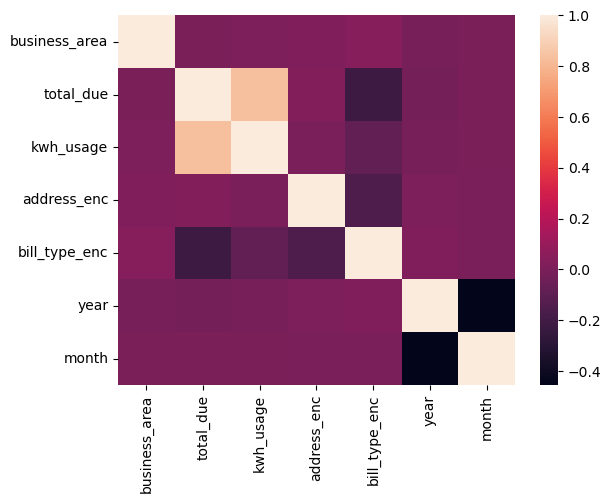

In [ ]:
sns.heatmap(data_main.corr())

There do not seem to be any features that have high correlation with kwh usage except total due. But this is to be expected since the amount of energy used is directly proportional to the cost.

It might be difficult to use the features as they are for ML modeling.

value_counts:
 T    187663
P      1297
C        11
Name: bill_type, dtype: int64


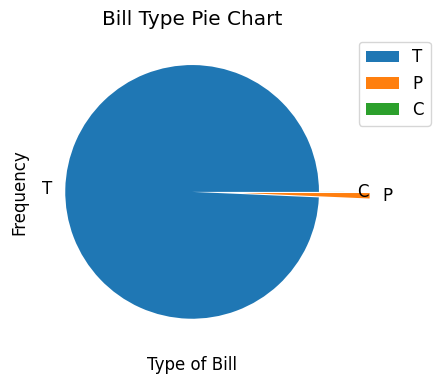

In [74]:
# Pie chart for 'Bill Type'
explode = (0, 0.4, 0.2)
plt.figure(figsize=(5, 4))
print('value_counts:\n', data_main['bill_type'].value_counts())
data_main['bill_type'].value_counts().plot(kind='pie', explode=explode) #, autopct='%1.10f%%')
plt.title('Bill Type Pie Chart')
plt.xlabel('Type of Bill')
plt.ylabel('Frequency')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

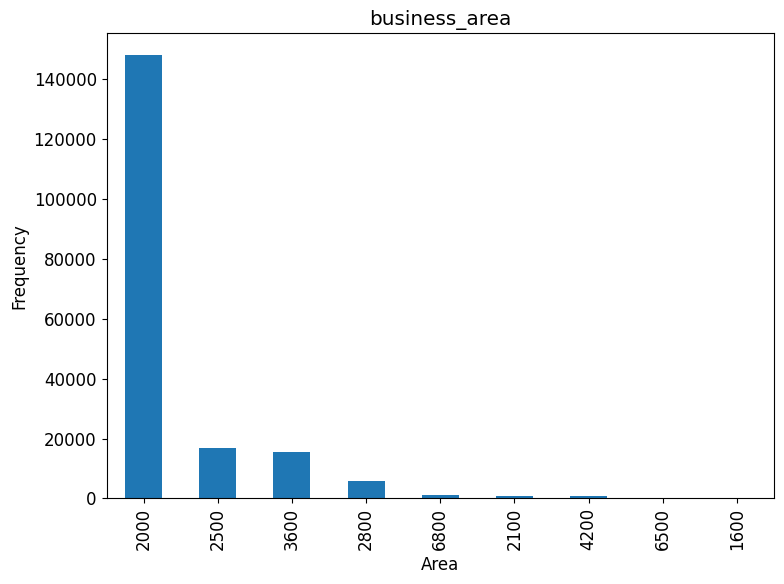

In [67]:
# Bar chart for 'Business Area'
plt.figure(figsize=(8, 6))
ax = data_main['business_area'].value_counts().plot(kind='bar')
plt.title('business_area')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

The business area 2000 is the most populous area based on the frequency plot.

And the most common type of Bill type is T.

### Visualization #2 - Sunil

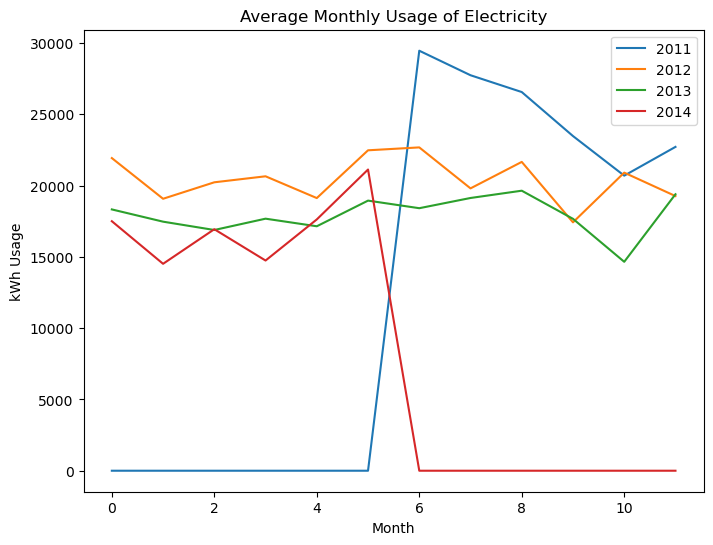

In [ ]:
viz_df_2 = data_main.groupby('bill_date').agg(
    {'kwh_usage':'mean'}
).reset_index()

temp_list = [0 for _ in range(12)]

date_dict = {
    '2011': temp_list.copy(),
    '2012': temp_list.copy(),
    '2013': temp_list.copy(),
    '2014': temp_list.copy(),
}

for date, usage in viz_df_2.values:
    date_dict[str(date.year)][date.month-1] = usage

usage_2011 = date_dict['2011']
usage_2012 = date_dict['2012']
usage_2013 = date_dict['2013']
usage_2014 = date_dict['2014']


plt.figure(figsize=(8,6))
plt.plot(range(12), usage_2011, label='2011')
plt.plot(range(12), usage_2012, label='2012')
plt.plot(range(12), usage_2013, label='2013')
plt.plot(range(12), usage_2014, label='2014')
plt.xlabel('Month')
plt.ylabel('kWh Usage')
plt.title('Average Monthly Usage of Electricity')
plt.legend()
plt.show()

In 2011 the first 6 months and  in 2014 the last 6 months have the value 0. This is due to the fact that the data has been collected for each year from July of the current year to June of the next year (Financial Year).

Similar to the previous plot, we can see the same trend. But one thing to be observed is that the trend across all these years has remained relatively same across the months even in these 4 years.

### Visualization #3 - Sourabh

In [ ]:
def plotbox(df, column):
    plot_features = df.groupby(pd.Grouper(freq=str(60)+'T')).mean().copy()
    plot_features[column] = [eval('x.%s'%column) for x in plot_features.index]
    plot_features.boxplot('kwh_usage', by=column, figsize=(12, 8), grid=False)
    plt.ylabel('kWh Usage')
    plt.xlabel(column)
    plt.show()

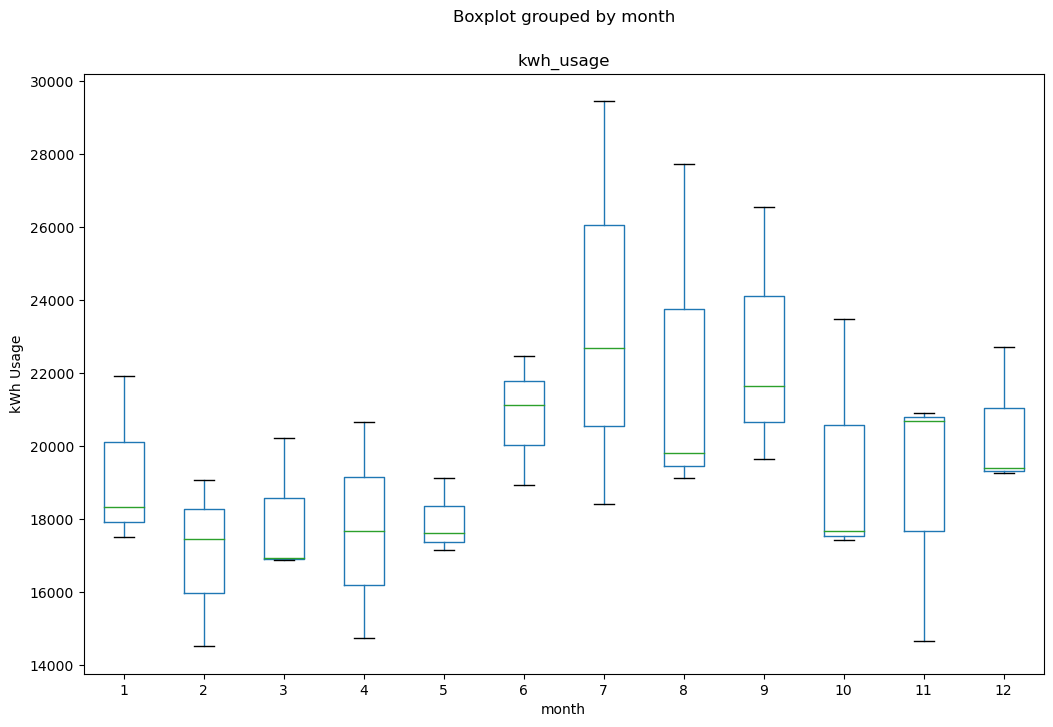

In [ ]:
plotbox(viz_df, 'month')

Based on the above box plot, we can see that the highest energy is consumed in the months of June-September. That is in the summer/fall season energy usage is quite high.

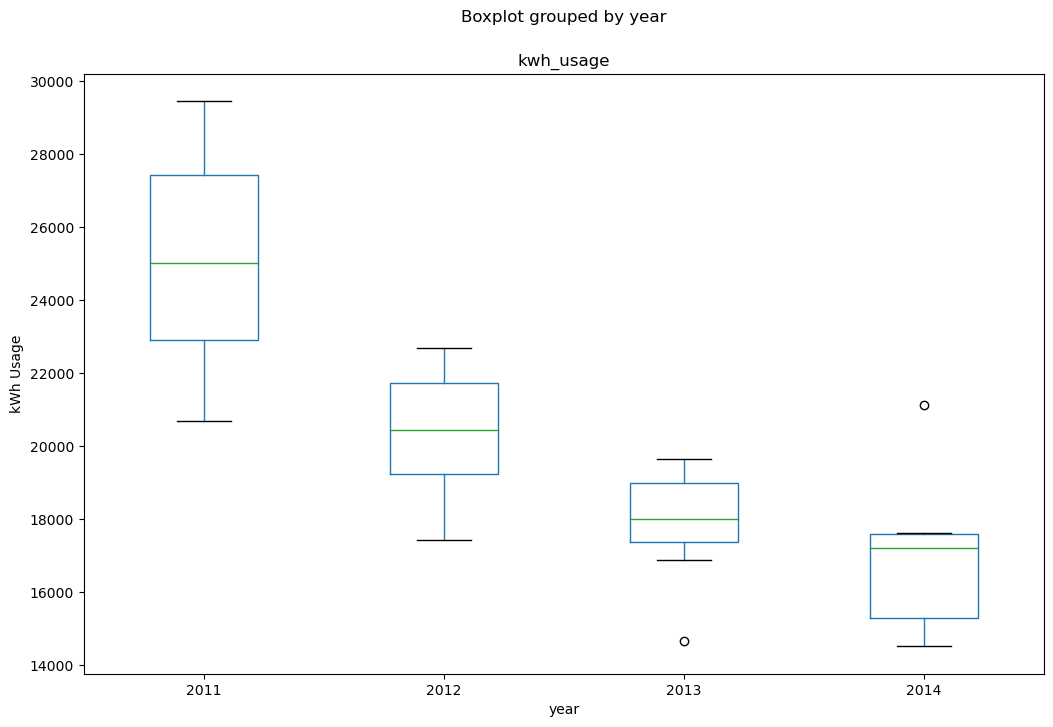

In [ ]:
plotbox(viz_df, 'year')

It was expected that energy consumption would increase through the years. It was surprising to see that the energy use in fact decreased. Further analysis needs to be done in order to see why this might have happened.

In [ ]:
data_main_agg = data_main.groupby('business_area').agg({
    'esid': pd.Series.nunique,
    'total_due': 'mean',
    'kwh_usage': 'mean',
})

data_main_agg.sort_values(by='kwh_usage', ascending=False)

esid     total_due      kwh_usage
business_area                                   
1600              2  20686.296296  267252.759259
4200             32  12314.233342  139198.855389
2800            202   7763.883129   99229.628037
6500             10   2069.572381   24864.882784
2500            574   1762.559758   21484.003090
2000           4759   1685.935398   16412.006549
2100             23   1153.184006   13450.079826
3600            449    856.760282    9159.579703
6800             39    308.368067    3174.383499

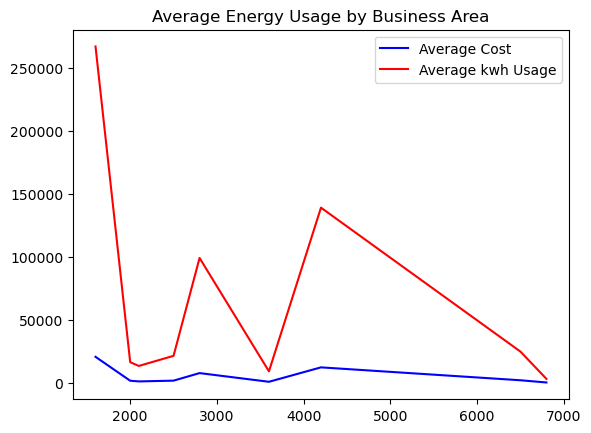

In [ ]:
plt.plot(
    data_main_agg.index, 
    data_main_agg['total_due'], 
    color='b', 
    label='Average Cost'
)
plt.plot(
    data_main_agg.index, 
    data_main_agg['kwh_usage'], 
    color='r', 
    label='Average kwh Usage'
)
plt.title('Average Energy Usage by Business Area')
plt.legend()
plt.show()

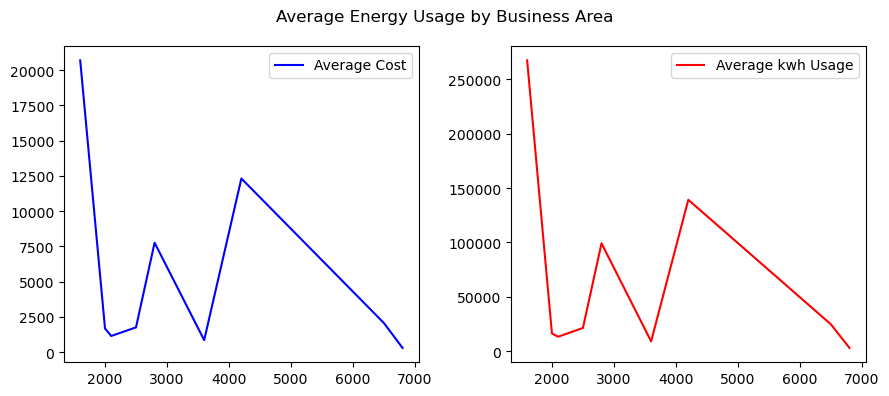

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
fig.suptitle('Average Energy Usage by Business Area')

axes[0].plot(
    data_main_agg.index, 
    data_main_agg['total_due'], 
    color='b', 
    label='Average Cost'
)
axes[0].legend()

axes[1].plot(
    data_main_agg.index, 
    data_main_agg['kwh_usage'], 
    color='r', 
    label='Average kwh Usage'
)
axes[1].legend()

fig.tight_layout()

plt.show()

This indicates that both the cost and kwh usage are indicating usage of electricity and the only difference between is the scale (a multiplicative factor). 

Therfore, analyzing just the kwh usage or just the price might be enough and both should be used in predictive tasks, i.e., if we are predicting kwh usage then price should not be present in the train dataset, as these two are different representations of the same thing which is usage.

### Visualization #4 - Sharmisha

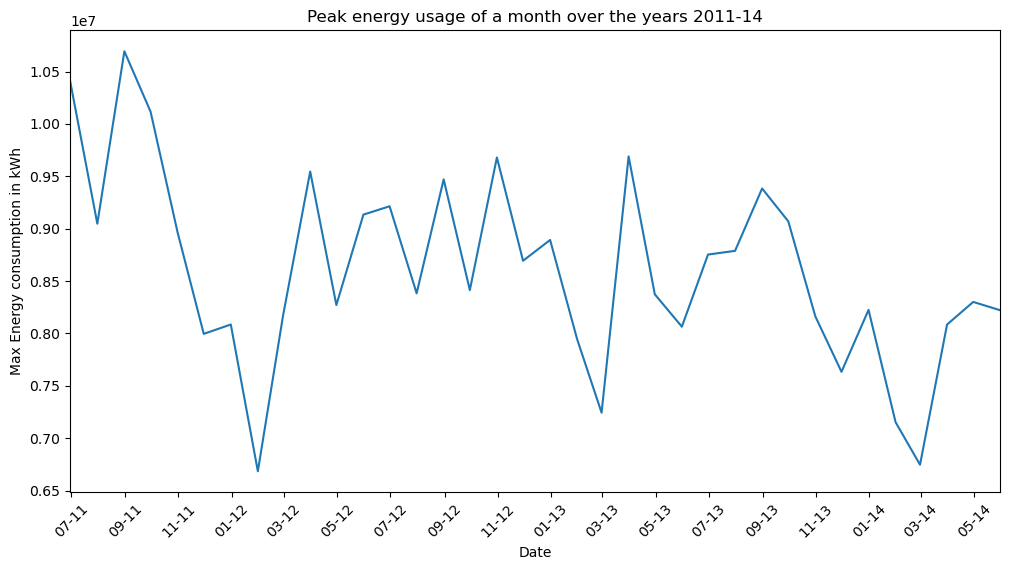

In [ ]:
monthly_en = viz_df.resample('M', label = 'left')['kwh_usage'].max()
plt.figure(figsize = (12,6))

#plotting the max monthly energy consumption
plt.plot(monthly_en)
plt.xlim(monthly_en.index.min(), monthly_en.index.max())
locator = mdates.MonthLocator(bymonthday = 1, interval = 2)
fmt = mdates.DateFormatter('%m-%y') 
X = plt.gca().xaxis
# Setting the locator
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.xticks(rotation = 45)
plt.ylabel('Max Energy consumption in kWh')
plt.xlabel('Date')
plt.title('Peak energy usage of a month over the years 2011-14')
plt.show()


There is a noticable trend in the usage of energy across the months starting from 2011 to 2014.

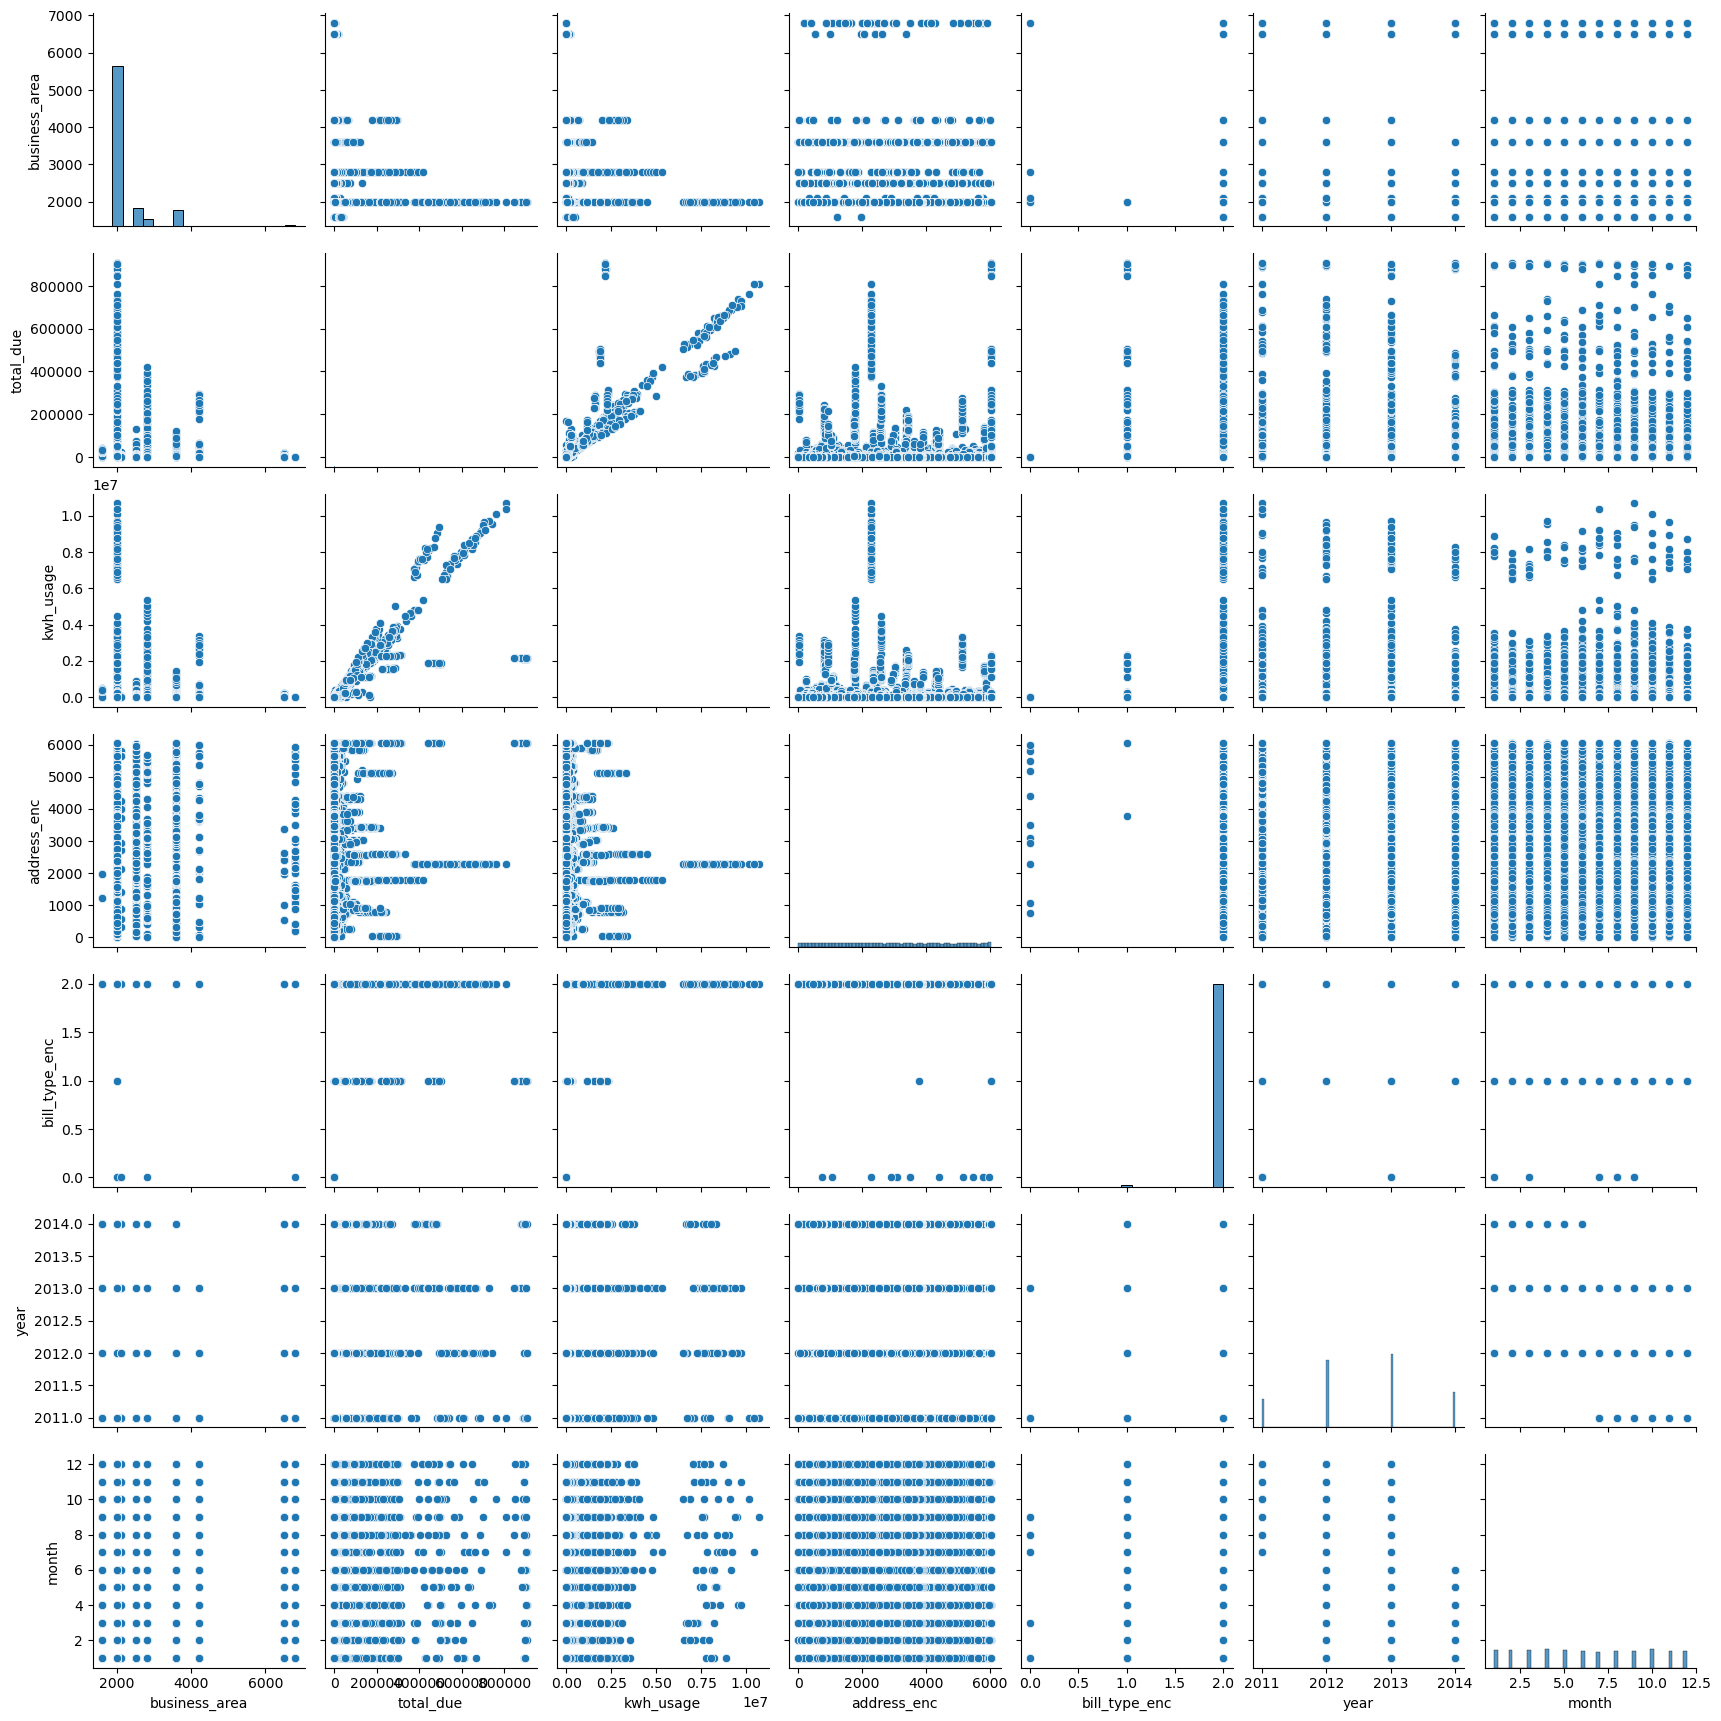

In [ ]:
sns.pairplot(data_main)

bill_type_counts_by_business_area:


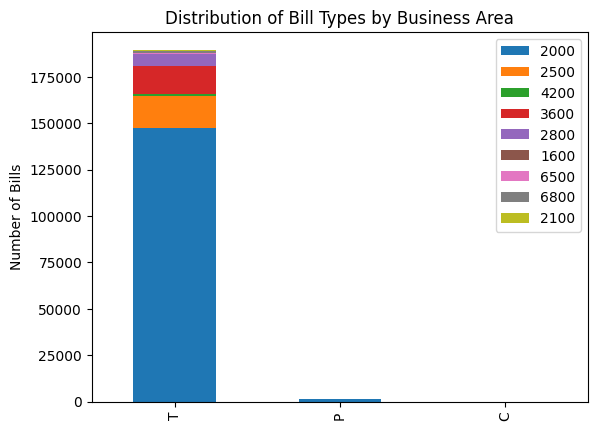

In [141]:
# Stacked bar chart to visualize the distribution of bill types across different business areas
business_areas = data_main['business_area'].unique()
if len(business_areas) > 0:
    bill_types = data_main['bill_type'].unique()

    business_area_counts = []
    for ba in business_areas:
        counts = data_main.loc[data_main['business_area'] == ba]['bill_type'].value_counts()
        business_area_counts.append(counts)

    bill_type_counts_by_business_area = pd.concat(business_area_counts, axis=1, keys=business_areas)
    print('bill_type_counts_by_business_area:')

    bill_type_counts_by_business_area.plot(kind='bar', stacked=True)

    # y-axis label
    plt.ylabel('Number of Bills')

    # Chart title
    plt.title('Distribution of Bill Types by Business Area')

    plt.show()    

## ML Models

In [ ]:
data_main = pd.read_csv('Electricity_Usage_Data.csv')

In [ ]:
data_main[['bill_date']] = data_main[['bill_date']].apply(pd.to_datetime)

In [ ]:
data_main.loc[:,'bill_date'] = data_main['bill_date'].apply(
    lambda x: pd.to_datetime(f'{x.year}-{x.month}-01')
)

In [ ]:
address_enc = LabelEncoder()
bill_type_enc = LabelEncoder()

data_main['address_enc'] = address_enc.fit_transform(
    data_main['service_address']
)
data_main['bill_type_enc'] = bill_type_enc.fit_transform(
    data_main['bill_type']
)
data_main['year'] = data_main['bill_date'].apply(lambda x:x.year)
data_main['month'] = data_main['bill_date'].apply(lambda x:x.month)

### Regression - Task: Predicting Energy Usage - Sourabh

Models Proposed:
1. Linear Regression - Simple and easy to understand model. Using this to set a baseline. assumes linear relationship between thhe input features and the target variable.
2. Gradient Boosting Regressor - Since this model is an ensemble model which combines, multiple decision tree. Expecting good accuracy from this model. can be computationally expensive and may require more resources to other models
3. Decision Tree Regressor - This is a simple, interpretable model. can handle non-linear relationships between the input features. Can be prone to overfitting on the train data

In [ ]:
data_main.head()

Q1 = data_main['kwh_usage'].quantile(0.25)
Q3 = data_main['kwh_usage'].quantile(0.75)
IQR = Q3 - Q1

Q1, Q3, IQR
data_main_filt = data_main[~(
    (data_main['kwh_usage'] < (Q1 - 1.5 * IQR)) | 
    (data_main['kwh_usage'] > (Q3 + 1.5 * IQR))
)]

data_main.shape, data_main_filt.shape

((191253, 11), (157498, 11))

Therefore, 33,755 rows have values that are considered outliers based on the IQR Method.

In [ ]:
def regression_metrics(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(f'Train R2 Score: {r2_score(y_train, y_train_pred)}')
    print(f'Test R2 Score: {r2_score(y_test, y_test_pred)}')

    print(f'Train MSE Score: {mean_squared_error(y_train, y_train_pred)}')
    print(f'Test MSE Score: {mean_squared_error(y_test, y_test_pred)}')

In [ ]:
X = data_main[[
    'business_area', 'address_enc', 'bill_type_enc', 'year', 'month'
]]
y = data_main[['kwh_usage']]

X_filt = data_main_filt[[
    'business_area', 'address_enc', 'bill_type_enc', 'year', 'month'
]]
y_filt = data_main_filt[['kwh_usage']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train_filt, X_test_filt, y_train_filt, y_test_filt = train_test_split(
    X_filt, y_filt, test_size=0.2, random_state=42
)

#### Linear Regression

In [ ]:
reg = LinearRegression().fit(X_train, y_train)
reg_filt = LinearRegression().fit(X_train_filt, y_train_filt)

In [ ]:
print('With Outliers')
regression_metrics(reg, X_train, X_test, y_train, y_test)

print('='*50)

print('Without Outliers')
regression_metrics(
    reg_filt, X_train_filt, X_test_filt, y_train_filt, y_test_filt
)

With Outliers
Train R2 Score: 0.009173833177215318
Test R2 Score: 0.007167343822345074
Train MSE Score: 39877725926.044525
Test MSE Score: 49616557595.280334
Without Outliers
Train R2 Score: 0.08955528262685242
Test R2 Score: 0.09509437141206156
Train MSE Score: 672051.7504459427
Test MSE Score: 694695.2188051218


#### Gradient Boosting Regression

In [ ]:
gbr = GradientBoostingRegressor().fit(X_train, np.ravel(y_train))
gbr_filt = GradientBoostingRegressor().fit(
    X_train_filt, np.ravel(y_train_filt)
)

In [ ]:
print('With Outliers')
regression_metrics(
    gbr, X_train, X_test, np.ravel(y_train), np.ravel(y_test)
)

print('='*50)

print('Without Outliers')
regression_metrics(
    gbr_filt, X_train_filt, X_test_filt, np.ravel(y_train_filt), np.ravel(y_test_filt)
)

With Outliers
Train R2 Score: 0.7043295722890507
Test R2 Score: 0.7315554088149221
Train MSE Score: 11899831348.320082
Test MSE Score: 13415449659.919912
Without Outliers
Train R2 Score: 0.1523656445581465
Test R2 Score: 0.15408797851650213
Train MSE Score: 625687.800085661
Test MSE Score: 649405.8808887758


#### Decision Tree Regressor

In [ ]:
dtr = DecisionTreeRegressor().fit(X_train, np.ravel(y_train))
dtr_filt = DecisionTreeRegressor().fit(X_train_filt, np.ravel(y_train_filt))

In [ ]:
print('With Outliers')
regression_metrics(
    dtr, X_train, X_test, np.ravel(y_train), np.ravel(y_test)
)

print('='*50)

print('Without Outliers')
regression_metrics(
    dtr_filt, X_train_filt, X_test_filt, np.ravel(y_train_filt), np.ravel(y_test_filt)
)

With Outliers
Train R2 Score: 0.9328533753005721
Test R2 Score: 0.9252101010668637
Train MSE Score: 2702446489.891373
Test MSE Score: 3737606035.4899774
Without Outliers
Train R2 Score: 0.9934125253356817
Test R2 Score: 0.8822752077931225
Train MSE Score: 4862.594943652055
Test MSE Score: 90377.21470310935


### Classification - Task: Predicting Type of Bill - Sharmisha

Models proposed:
1. Logistic Regression - widely used interpretable model which can be used for setting a baseline accuracy. This model assumed linear relationship between the variables, so mighht give bad results

2. Decision Tree Classifier - It can handle the non-linear relationships well between input and target variable. Can be prone to overfitting on the train data.

3. Random Forest Classifier - ensemble model, takes advantage of multiple decision trees to create a powerful model. But this model is not easy to interpret and requires more computational resource to run.

In [ ]:
def classification_metrics(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(
        f'Train F1 Score: {f1_score(y_train, y_train_pred, average="macro")}'
    )
    print(
        f'Test F1 Score: {f1_score(y_test, y_test_pred, average="macro")}'
    )

    print(f'Train Accuracy Score: {accuracy_score(y_train, y_train_pred)}')
    print(f'Test Accuract Score: {accuracy_score(y_test, y_test_pred)}')

In [ ]:
X = data_main[[
    'business_area', 'address_enc', 'kwh_usage', 'year', 'month'
]]
y = data_main[['bill_type_enc']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#### Logistic Regression

In [ ]:
lreg = LogisticRegression().fit(X_train, np.ravel(y_train))

C:\Users\sbelde3\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
classification_metrics(lreg, X_train, X_test, y_train, y_test)

Train F1 Score: 0.44078631425979947
Test F1 Score: 0.43995857012872036
Train Accuracy Score: 0.9931112011607691
Test Accuract Score: 0.9935426524796738


#### Decision Tree Classifier

In [ ]:
dtc = DecisionTreeClassifier().fit(X_train, y_train)

In [ ]:
classification_metrics(dtc, X_train, X_test, y_train, y_test)

Train F1 Score: 0.9998707454630322
Test F1 Score: 0.6666403148167668
Train Accuracy Score: 0.9999934641377237
Test Accuract Score: 0.9998431413557816


#### Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier().fit(X_train, np.ravel(y_train))

In [ ]:
classification_metrics(
    dtc, X_train, X_test, np.ravel(y_train), np.ravel(y_test)
)

Train F1 Score: 0.9998707454630322
Test F1 Score: 0.6666403148167668
Train Accuracy Score: 0.9999934641377237
Test Accuract Score: 0.9998431413557816


### Time-Series Analysis - Hyndavi

Proposed Models:
1. VAR - can model multiple time series variables simultaneously and capture complex relationships between multiple time series variables. But this model can be sensitive to the number of lags used in the model.
2. ARIMA - Can capture the autocorrelation and trends in the time series data as well as seasonality. But it may not perform well with long term forecasting and requires turning to make it optimal
3. LSTM - can model complex relationships between time series data such as non-stationary and non-linear time series data. But it requires a lot of computational resources compared to the other models.

Currently still working on time-series analysis.

In [4]:
# Mount drive to colab file
from google.colab import drive
drive.mount('/content/drive')

# Insert, change the directory 
import sys
sys.path.insert(0,'/content/drive/MyDrive/CS418-Project-main')
%cd /content/drive/MyDrive/CS418-Project-main

Mounted at /content/drive
/content/drive/MyDrive/CS418-Project-main


In [1]:
# !pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.2 MB/s eta 0:00:00


Load all the data from the files, which was cleaned and pre-processed by all the team members. 

In [5]:
data_2012_main = pd.read_csv('electricity_usage_data_2012.csv')
data_2013_main = pd.read_csv('electricity_usage_data_2013.csv')
data_2013_2_main = pd.read_csv('electricity_usage_data_2013_2.csv')
data_2014_main = pd.read_csv('electricity_usage_data_2014.csv')

In [9]:
# Remove outliers in data
zscore_2012 = stats.zscore(data_2012_main[['total_due', 'kwh_usage']])
print('data_2012_main shape before removing outliers: {}'.format(data_2012_main.shape))
data_2012_main = data_2012_main[(np.abs(zscore_2012) < 3).all(axis=1)]
print('data_2012_main shape after removing outliers: {}'.format(data_2012_main.shape), '\n')

zscore_2013 = stats.zscore(data_2013_main[['total_due', 'kwh_usage']])
print('data_2013_main shape before removing outliers: {}'.format(data_2013_main.shape))
data_2013_main = data_2013_main[(np.abs(zscore_2013) < 3).all(axis=1)]
print('data_2013_main shape after removing outliers: {}'.format(data_2013_main.shape), '\n')

zscore_2013_2 = stats.zscore(data_2013_2_main[['total_due', 'kwh_usage']])
print('data_2013_2_main shape before removing outliers: {}'.format(data_2013_2_main.shape))
data_2013_2_main = data_2013_2_main[(np.abs(zscore_2013_2) < 3).all(axis=1)]
print('data_2013_2_main shape after removing outliers: {}'.format(data_2013_2_main.shape), '\n')

zscore_2014 = stats.zscore(data_2014_main[['total_due', 'kwh_usage']])
print('data_2014_main shape before removing outliers: {}'.format(data_2014_main.shape))
data_2014_main = data_2014_main[(np.abs(zscore_2014) < 3).all(axis=1)]
print('data_2014_main shape after removing outliers: {}'.format(data_2014_main.shape), '\n')

data_2012_main shape before removing outliers: (57025, 7)
data_2012_main shape after removing outliers: (55974, 7) 

data_2013_main shape before removing outliers: (66360, 7)
data_2013_main shape after removing outliers: (65306, 7) 

data_2013_2_main shape before removing outliers: (65805, 7)
data_2013_2_main shape after removing outliers: (65388, 7) 

data_2014_main shape before removing outliers: (67838, 7)
data_2014_main shape after removing outliers: (67427, 7) 



Verify the data to check nulls, duplicate rows, and save final data into csv file

In [10]:
df_list = [data_2012_main, data_2013_main, data_2013_2_main, data_2014_main]

data = pd.concat(df_list)
print('data.shape', data.shape, '\n')

# Checking nulls in the data
print('Nulls in the data:\n', data.isna().sum(), '\n')

# Checking for duplicate rows
dup_rows_index = data.duplicated(subset=['esid', 'business_area', 'service_address', 'bill_date'])
print('duplicate rows', (dup_rows_index).sum(), '\n')

# Removing the duplicates
data_main = data[~(dup_rows_index)]
print('data_main.shape', data_main.shape, '\n')
# last result - data_main.shape (190848, 7) 

# saving into csv files
data_main.to_csv('Electricity_Usage_Data.csv', index=False)

data.shape (254095, 7) 

Nulls in the data:
 esid               0
business_area      0
service_address    0
bill_type          0
bill_date          0
total_due          0
kwh_usage          0
dtype: int64 

duplicate rows 65124 

data_main.shape (188971, 7) 



### Prepocessing data for Model

In [12]:
plt.rcParams.update({'font.size': 12})

data_df = pd.read_csv('Electricity_Usage_Data.csv')
address_enc = LabelEncoder()
bill_type_enc = LabelEncoder()

data_df['bill_date']=pd.to_datetime(data_df['bill_date'])
data_df['year'] = data_df['bill_date'].apply(lambda x: x.year)
data_df['month'] = data_df['bill_date'].apply(lambda x: x.month)
data_df['year_month'] = data_df['bill_date'].dt.date.apply(lambda x: x.strftime('%Y-%m'))
data_df['week'] = data_df.apply(lambda row: row['bill_date'].week+52*(int(row['year'])-2011),axis=1)

data_df.head()

esid  business_area    service_address bill_type  \
0  1008901000140220013100           2500  17000 ALDINE WFLD         T   
1  1008901000140220013100           2500  17000 ALDINE WFLD         T   
2  1008901000140220013100           2500  17000 ALDINE WFLD         T   
3  1008901000141370015100           2000         449 W 19TH         T   
4  1008901000141370015100           2000         449 W 19TH         T   

   bill_date  total_due  kwh_usage  year  month year_month  week  
0 2012-02-28   10612.81   100461.0  2012      2    2012-02    61  
1 2012-01-31   11689.34   117843.0  2012      1    2012-01    57  
2 2011-12-30   11173.67   115471.0  2011     12    2011-12    52  
3 2012-06-18    6457.79    79984.0  2012      6    2012-06    77  
4 2012-05-15    5809.91    69067.0  2012      5    2012-05    72

In [13]:
df = data_df[['kwh_usage', 'week']]
df = df.groupby(by=['week']).mean()

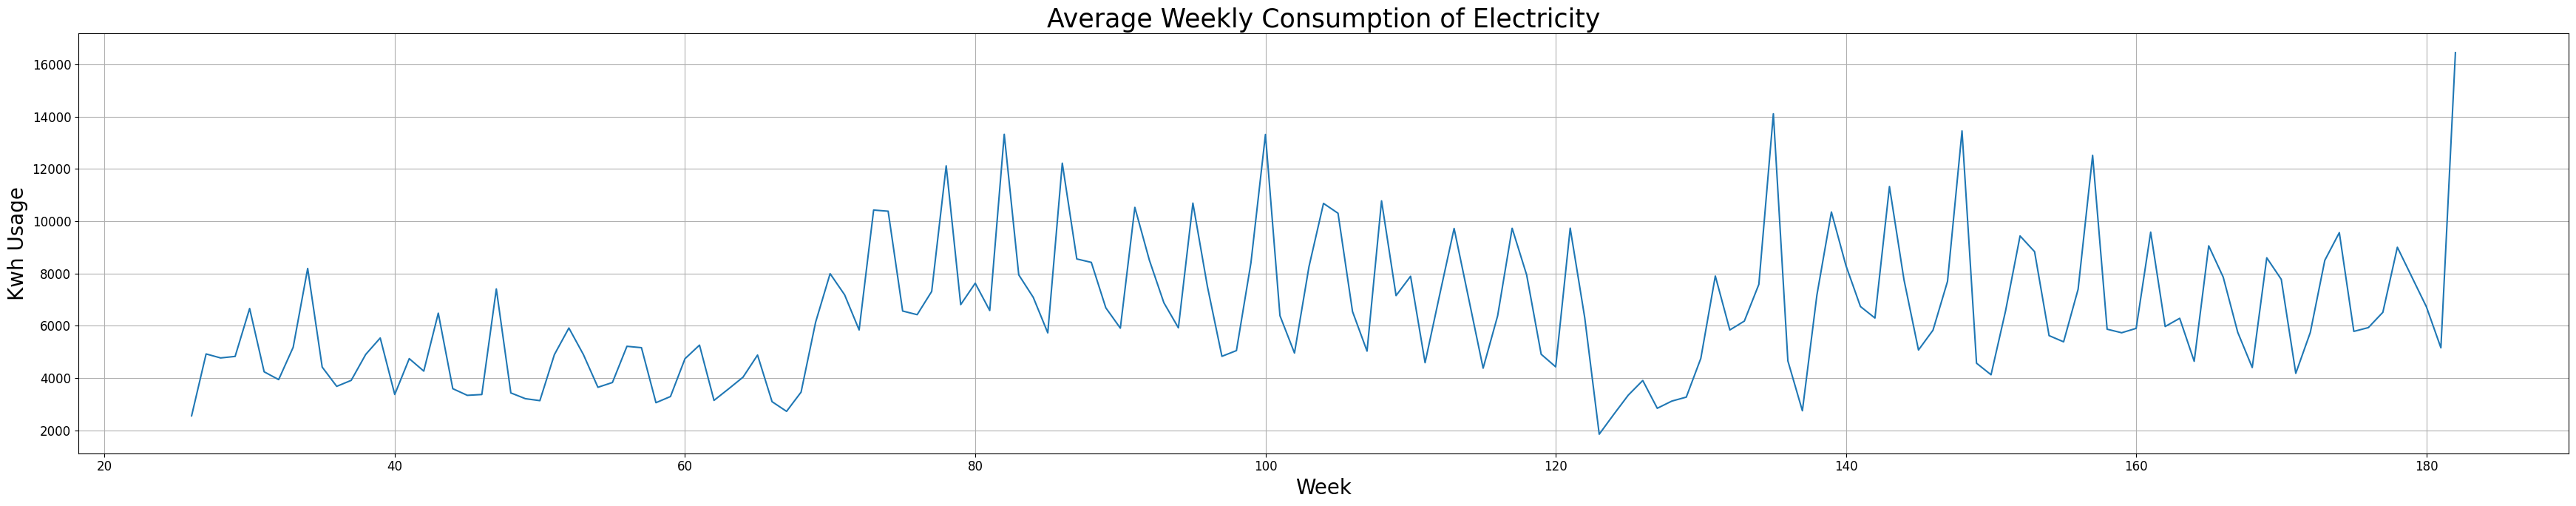

In [14]:
plt.figure(figsize=(35, 7))

plt.grid()
plt.plot(df)

plt.title('Average Weekly Consumption of Electricity', fontsize=25)
plt.xlabel('Week', fontsize=20)
plt.ylabel('Kwh Usage', fontsize=20)

plt.tight_layout()

### **Check whether the series is stationary?**
Stationary time series is the one whose satistical properties(mean, var, etc.) donot change over time. \

We need to perform additional check to find if the series is stationary?

We'll use rolling statistics first, followed by Dickey-Fuller test to check if the series is stationary and make it stationary if not.

### Rolling Statistics Method

In [15]:
rolling_mean = df.rolling(2).mean()
rolling_std = df.rolling(2).std()

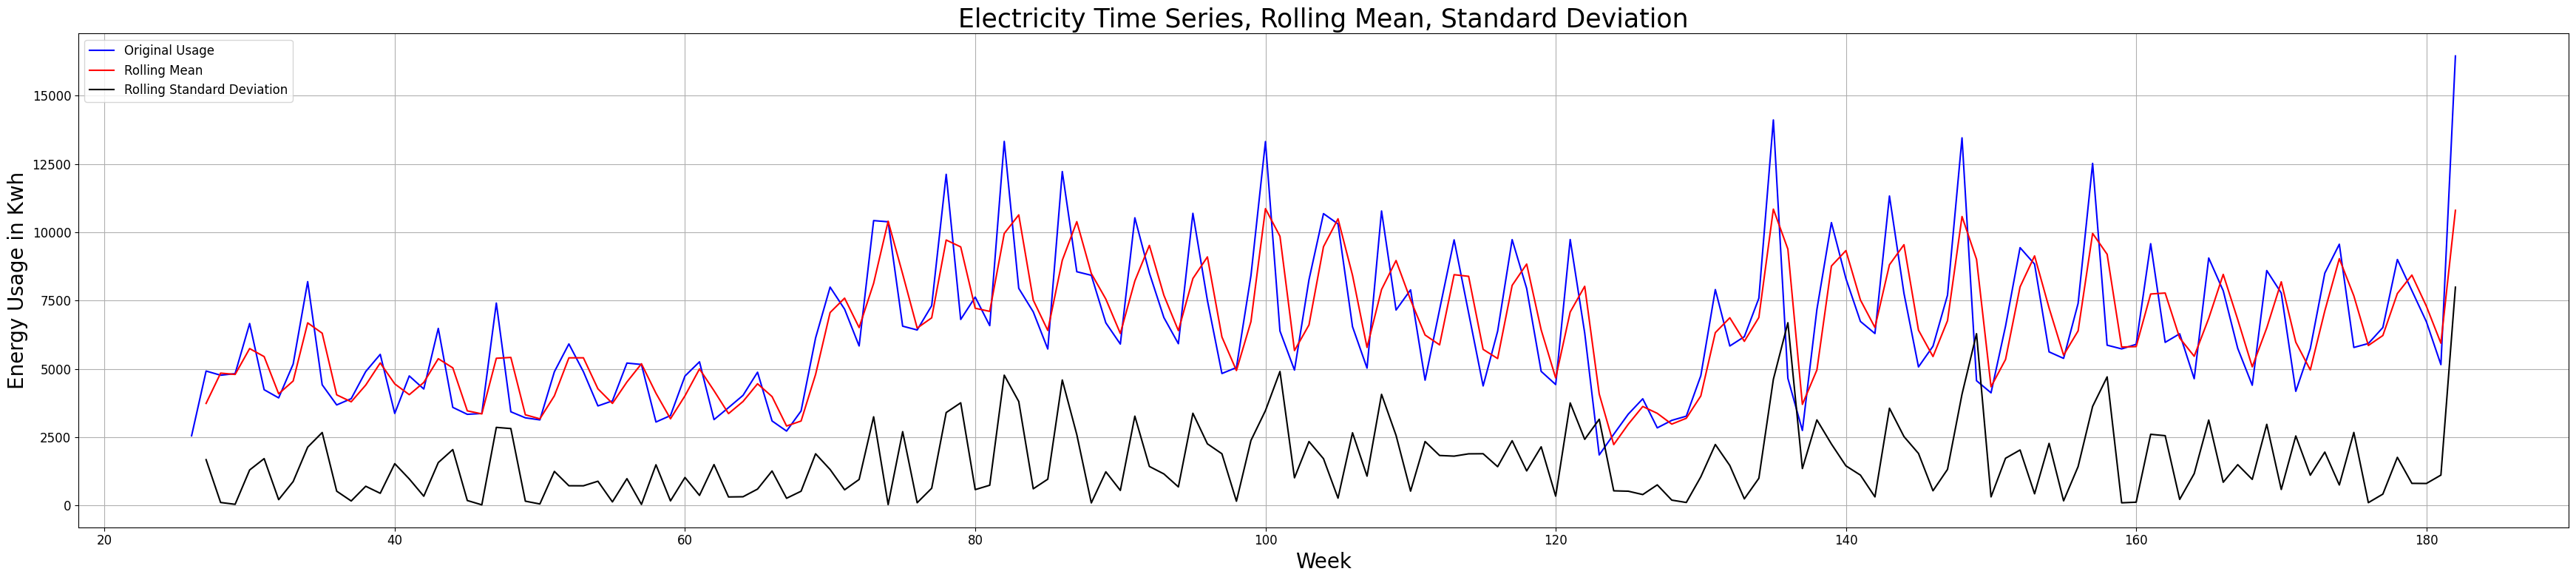

In [16]:
plt.figure(figsize=(35, 8))
plt.grid()

plt.plot(df, color="blue",label="Original Usage")
plt.plot(rolling_mean, color="red", label="Rolling Mean")
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation")

plt.title('Electricity Time Series, Rolling Mean, Standard Deviation', fontsize=25)
plt.xlabel('Week', fontsize=20)
plt.ylabel('Energy Usage in Kwh', fontsize=20)

plt.legend(loc="upper left")
plt.tight_layout()

We see that statistics are not constant over the time, but to confirm we'll perform additional statistical test using augmented Dickey-Fuller method.

### Augmented Dickey-Fuller Test:
H0 = Null-hypothesis => It has unit root, the series is non-stationary \
H1 = Alternate-hypothesis => No unit root, the series is stationary

If p-value < critical value [0.05] -> We reject the null-hypothesis H0 \
If p-value > critical value [0.05] -> We fail to reject null-hypothesis H0

In [17]:
def aug_dickey_fuller_test(df):
  adft = adfuller(df, autolag="AIC")
  output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']], 
                            "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
  print(output_df)

In [18]:
aug_dickey_fuller_test(df)

       Values                       Metric
0   -1.831026              Test Statistics
1    0.365171                      p-value
2   12.000000             No. of lags used
3  144.000000  Number of observations used
4   -3.476598          critical value (1%)
5   -2.881829          critical value (5%)
6   -2.577589         critical value (10%)


### Dickey-Fuller Test Result:

As (Test Statistics -1.83 > -2.88 critical value (5%)), p-value > 0.05, we fail to reject the null-hypothesis, and thus the time series is non-stationary.

### **Make the Series Stationary**

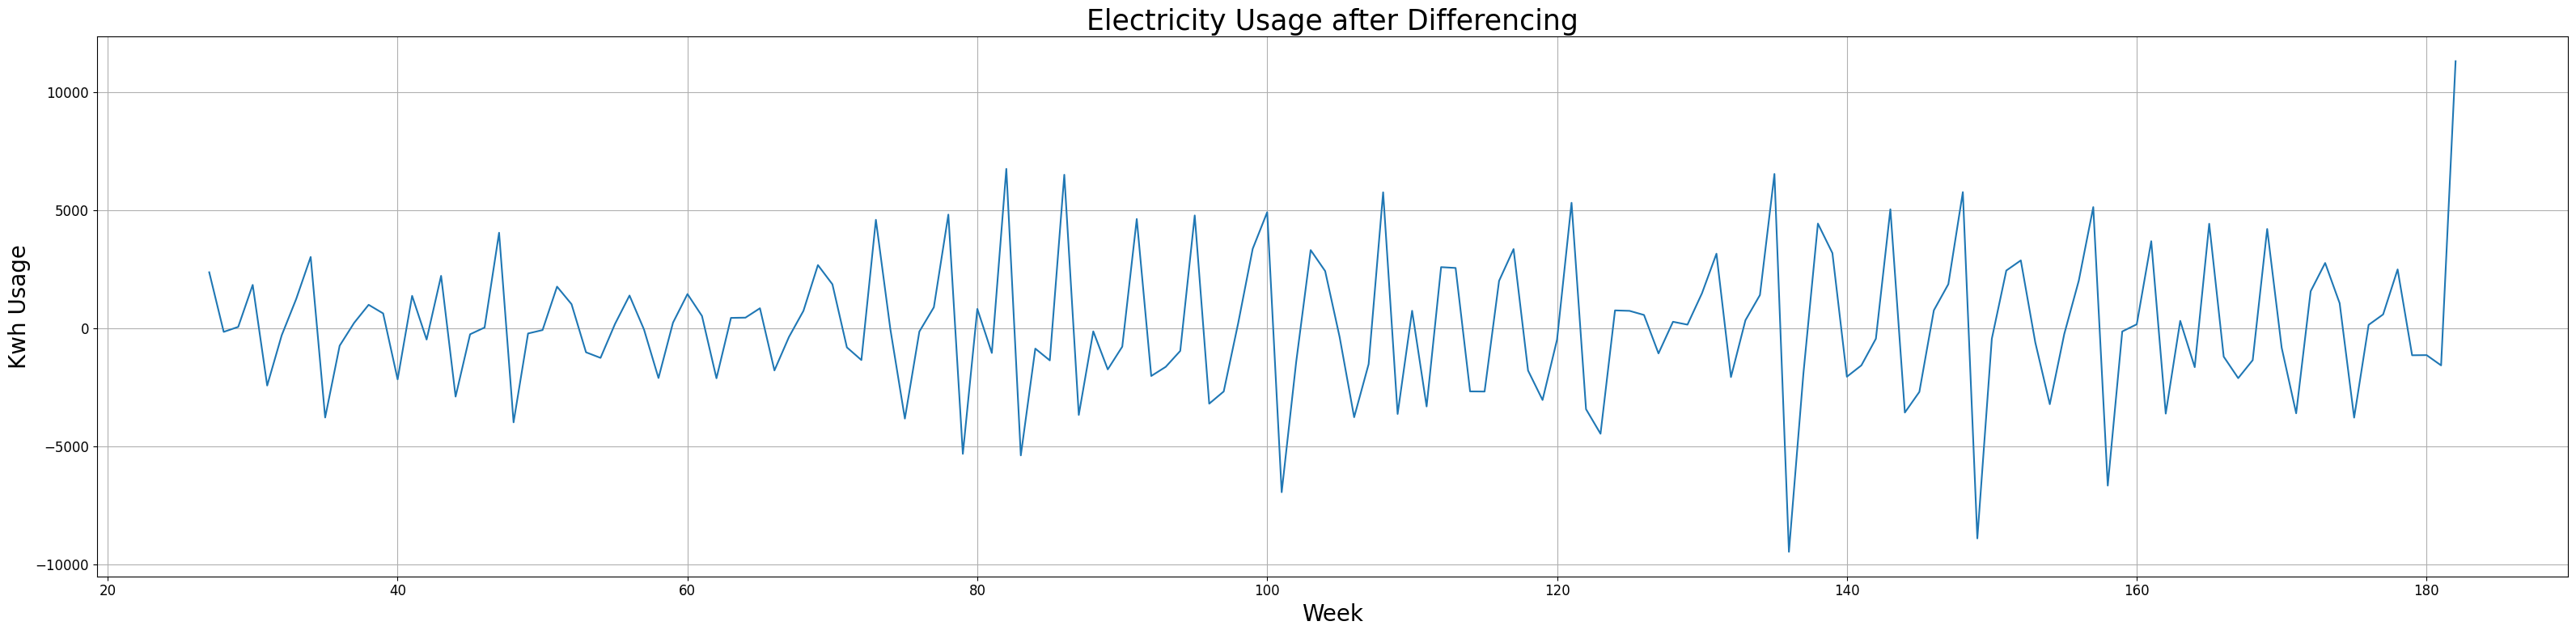

In [19]:
# First we'll perform differencing on the data to see if it becomes stationary
diff_df = df.diff()

plt.figure(figsize=(32, 8))
plt.grid()
plt.plot(diff_df)

plt.title('Electricity Usage after Differencing', fontsize=25)
plt.xlabel('Week', fontsize=20)
plt.ylabel('Kwh Usage', fontsize=20)

plt.tight_layout()

In [20]:
# Confirm with the dickey-fuller test
aug_dickey_fuller_test(diff_df.dropna())

       Values                       Metric
0   -4.550132              Test Statistics
1    0.000159                      p-value
2   11.000000             No. of lags used
3  144.000000  Number of observations used
4   -3.476598          critical value (1%)
5   -2.881829          critical value (5%)
6   -2.577589         critical value (10%)


Here, (Test Statistics = -4.55 <  critical value (5%) of -2.88), p-value is < 0.05 so we reject the null hypothesis and accept the alternate hypothesis, hence considers the **time series is stationary** for order difference of 1 (d).

### ARIMA - AutoRegressive Integrated Moving Average

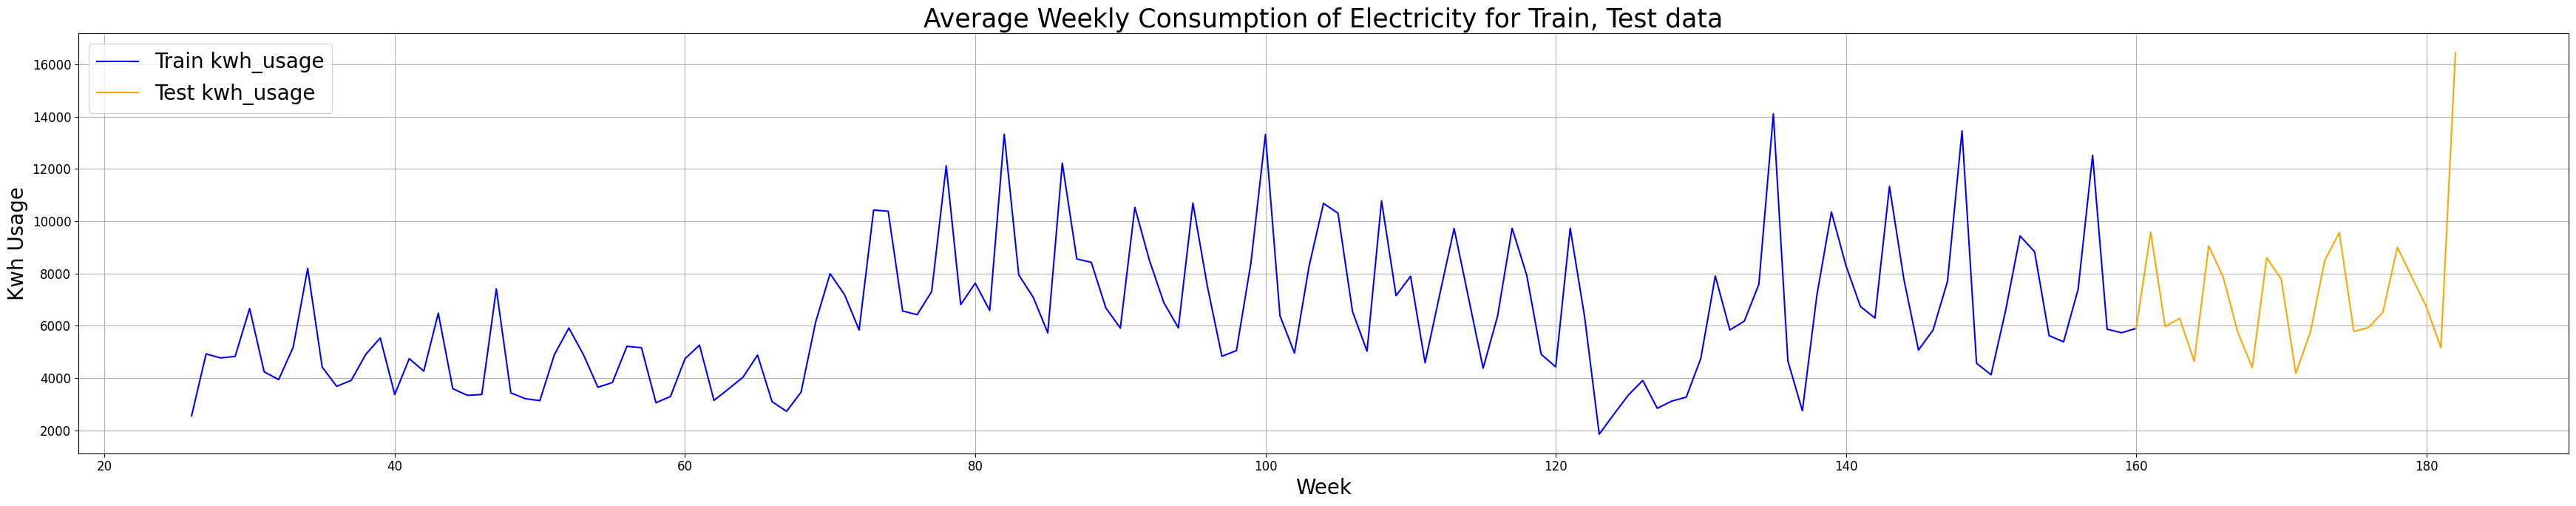

In [22]:
# week wise data split
train_data = df.loc['0':'160']
test_data = df.loc['160':]

plt.figure(figsize=(35, 7))
plt.grid()

plt.plot(train_data, c='blue', label='Train kwh_usage')
plt.plot(test_data, c='orange', label='Test kwh_usage')
plt.legend(loc='upper left', prop={'size':20})

plt.title('Average Weekly Consumption of Electricity for Train, Test data', fontsize=25)
plt.xlabel('Week', fontsize=20)
plt.ylabel('Kwh Usage', fontsize=20)

plt.tight_layout()

In [24]:
# Find the order of the ARIMA model
order_df = auto_arima(df, trace=True, suppress_warnings=True)
order_df.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2845.007, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2947.089, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2939.772, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2885.511, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2945.228, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2884.697, Time=1.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2861.588, Time=0.46 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2807.713, Time=0.27 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2818.737, Time=0.16 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=2808.010, Time=1.73 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2802.027, Time=1.24 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2814.505, Time=1.01 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=2804.960, Time=1.34 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=2802.381, Time=0.74 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  157
Model:               SARIMAX(3, 1, 3)   Log Likelihood               -1393.435
Date:                Thu, 04 May 2023   AIC                           2800.870
Time:                        00:33:06   BIC                           2822.219
Sample:                             0   HQIC                          2809.542
                                - 157                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0398      0.118     -0.337      0.736      -0.271       0.191
ar.L2         -0.9198      0.035    -26.484      0.000      -0.988      -0.852
ar.L3         -0.2937      0.117     -2.508      0.012      -0.523      -0.064
ma.L1         -0.7610      0.113     -6.758      0.000      -0.982      -0.540
ma.L2          1.0158      0.076     13.279      0.000       0.866       1.166
ma.L3         -0.4996      0.105     -4.756      0.000      -0.706      -0.294
sigma2      3.525e+06   1.35e-08   2.61e+14      0.000    3.53e+06    3.53e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                40.44
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.94   Skew:                             0.89
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.87e+30. Standard errors may be unstable.
"""

In [64]:
# With the optimised (p, d, q) based on the above auto_arima results, and as we also know (d=1) which is identified while making the series stationary
model = ARIMA(train_data, order=(3, 1, 3)).fit()

# Prediction
pred = model.predict(start=len(train_data)-1,end=(len(df)-1))

# Model Summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              kwh_usage   No. Observations:                  135
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -1193.626
Date:                Thu, 04 May 2023   AIC                           2401.252
Time:                        00:57:05   BIC                           2421.537
Sample:                             0   HQIC                          2409.495
                                - 135                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0083      0.142      0.058      0.954      -0.271       0.287
ar.L2         -0.9245      0.040    -23.401      0.000      -1.002      -0.847
ar.L3         -0.2610      0.137     -1.899      0.058      -0.530       0.008
ma.L1         -0.7966      0.151     -5.282      0.000      -1.092      -0.501
ma.L2          1.0392      0.100     10.400      0.000       0.843       1.235
ma.L3         -0.4557      0.126     -3.607      0.000      -0.703      -0.208
sigma2      3.384e+06   2.39e-09   1.42e+15      0.000    3.38e+06    3.38e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.02
Prob(Q):                              0.99   Prob(JB):                         0.08
Heteroskedasticity (H):               2.03   Skew:                             0.46
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.06e+32. Standard errors may be unstable.
"""

In [65]:
# Evaluation
print('Mean Absolute Error: %.2f' % mean_absolute_error(test_data['kwh_usage'].values, pred))
print('Root Mean Squared Error: %.2f' % np.sqrt(mean_squared_error(test_data['kwh_usage'], pred)))

Mean Absolute Error: 1493.04
Root Mean Squared Error: 2260.68


In [26]:
pred = pd.Series(list(pred.values), index=list(test_data.index))

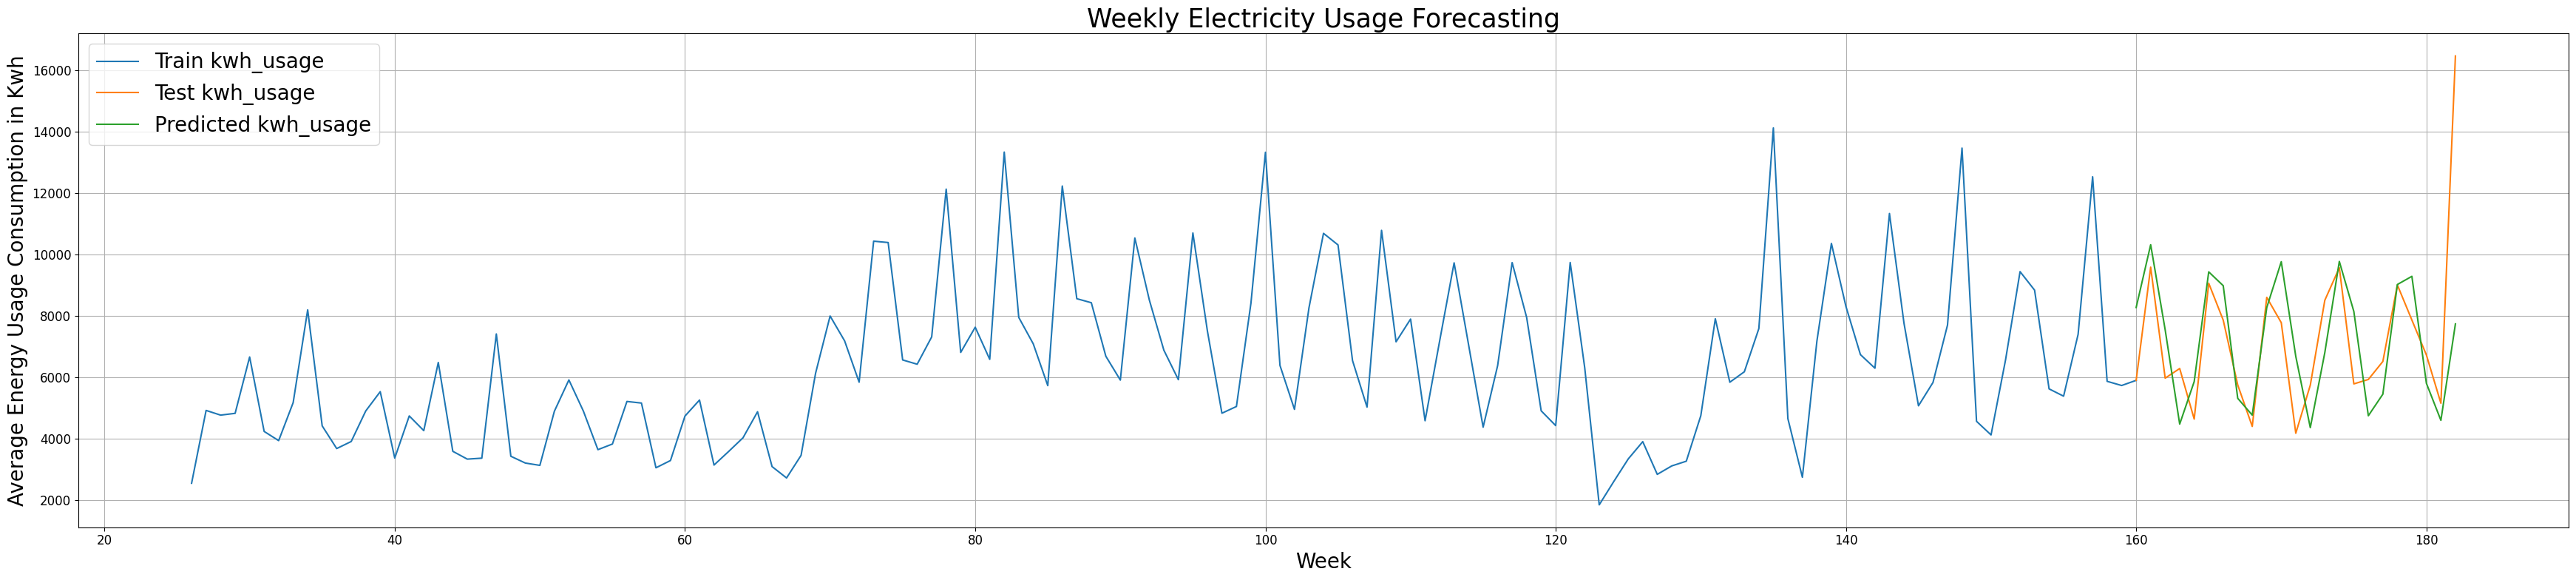

In [27]:
plt.figure(figsize=(35, 8))
plt.grid()

plt.plot(train_data, label = 'Train kwh_usage')
plt.plot(test_data, label = 'Test kwh_usage')
plt.plot(pred, label = 'Predicted kwh_usage')

plt.title('Weekly Electricity Usage Forecasting', fontsize=25)
plt.xlabel('Week', fontsize=20)
plt.ylabel('Average Energy Usage Consumption in Kwh', fontsize=20)
plt.legend(loc='upper left', prop={'size': 20})
plt.tight_layout()

### VAR - Vector AutoRegressive

In [29]:
# week wise data
var_df = data_df[['week', 'total_due', 'kwh_usage']]
group_df = var_df.groupby(['week']).mean()

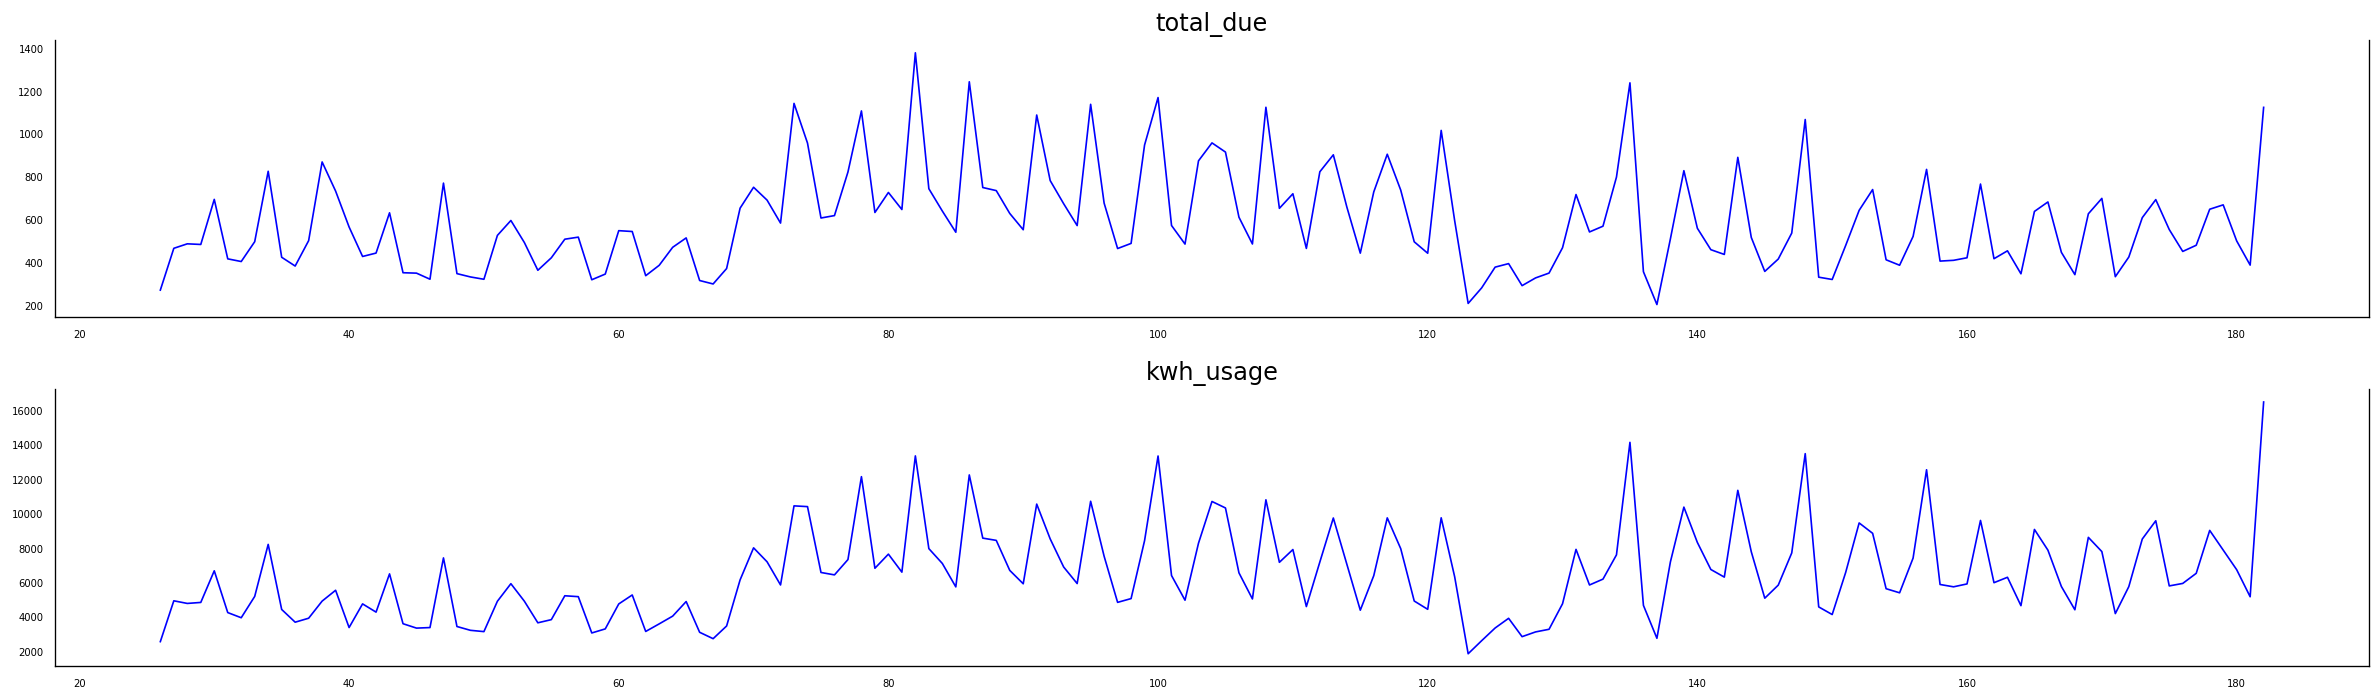

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=1, dpi=120, figsize=(20,6))
for i, ax in enumerate(axes.flatten()):
    # data = var_df['bill_date', var_df.columns[i]].groupby('bill_date').mean()
    data = group_df[group_df.columns[i]]
    ax.plot(data, color='blue', linewidth=1)
    
    # Decorations
    ax.set_title(group_df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [31]:
print('kwh_usage augmented dickey-fuller test:')
aug_dickey_fuller_test(group_df['kwh_usage'])
print('\n')
print('total_due augmented dickey-fuller test:')
aug_dickey_fuller_test(group_df['total_due'])

kwh_usage augmented dickey-fuller test:
       Values                       Metric
0   -1.831026              Test Statistics
1    0.365171                      p-value
2   12.000000             No. of lags used
3  144.000000  Number of observations used
4   -3.476598          critical value (1%)
5   -2.881829          critical value (5%)
6   -2.577589         critical value (10%)


total_due augmented dickey-fuller test:
       Values                       Metric
0   -1.710329              Test Statistics
1    0.425798                      p-value
2   12.000000             No. of lags used
3  144.000000  Number of observations used
4   -3.476598          critical value (1%)
5   -2.881829          critical value (5%)
6   -2.577589         critical value (10%)


In [34]:
# Perform one order differecing and see if it becomes stationary and confirm with the dickey-fuller test
print('kwh_usage adf test on diff data:')
aug_dickey_fuller_test(group_df['kwh_usage'].diff().dropna())
print('\n')
print('total_due adf test on diff data:')
aug_dickey_fuller_test(group_df['total_due'].diff().dropna())

kwh_usage adf test on diff data:
       Values                       Metric
0   -4.550132              Test Statistics
1    0.000159                      p-value
2   11.000000             No. of lags used
3  144.000000  Number of observations used
4   -3.476598          critical value (1%)
5   -2.881829          critical value (5%)
6   -2.577589         critical value (10%)


total_due adf test on diff data:
       Values                       Metric
0   -5.288116              Test Statistics
1    0.000006                      p-value
2   11.000000             No. of lags used
3  144.000000  Number of observations used
4   -3.476598          critical value (1%)
5   -2.881829          critical value (5%)
6   -2.577589         critical value (10%)


One order differencing of kwh_usage, total_due made the series stationary

In [35]:
print('kwh_usage causes total_due?\n')
print('------------------')
granger_1 = grangercausalitytests(group_df[['kwh_usage', 'total_due']], 4)

print('\n total_due causes kwh_usage?\n')
print('------------------')
granger_2 = grangercausalitytests(group_df[['total_due', 'kwh_usage']], 4)

kwh_usage causes total_due?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4014  , p=0.5273  , df_denom=153, df_num=1
ssr based chi2 test:   chi2=0.4092  , p=0.5224  , df=1
likelihood ratio test: chi2=0.4087  , p=0.5226  , df=1
parameter F test:         F=0.4014  , p=0.5273  , df_denom=153, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.4939  , p=0.0329  , df_denom=150, df_num=2
ssr based chi2 test:   chi2=7.2208  , p=0.0270  , df=2
likelihood ratio test: chi2=7.0577  , p=0.0293  , df=2
parameter F test:         F=3.4939  , p=0.0329  , df_denom=150, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.2156  , p=0.0888  , df_denom=147, df_num=3
ssr based chi2 test:   chi2=6.9634  , p=0.0731  , df=3
likelihood ratio test: chi2=6.8106  , p=0.0782  , df=3
parameter F test:         F=2.2156  , p=0.0888  , df_denom=147, df_num=3

Granger Causality
number of lags (no zero) 4


In [37]:
# week wise data split
train_data = group_df.loc['0':'160']
test_data = group_df.loc['160':]

In [38]:
model = VAR(train_data)

order = model.select_order(maxlags=20)
print(order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        24.84       24.89   6.145e+10       24.86
1        24.17       24.31   3.142e+10       24.23
2        24.01       24.25   2.680e+10       24.11
3        23.91       24.24   2.412e+10       24.04
4        23.27      23.70*   1.273e+10       23.44
5        23.23       23.75   1.224e+10      23.44*
6        23.25       23.87   1.256e+10       23.50
7        23.25       23.96   1.250e+10       23.54
8        23.23       24.05   1.236e+10       23.56
9        23.15       24.06   1.139e+10       23.52
10       23.13       24.13   1.120e+10       23.54
11       23.17       24.26   1.163e+10       23.61
12       23.20       24.40   1.211e+10       23.69
13      23.01*       24.30  1.003e+10*       23.53
14       23.05       24.44   1.051e+10       23.62
15       23.03       24.51   1.031e+10       23.63
16       23.05       24.63   1.

Based on the above results, the minimum vaues of AIC, FPE are observed at lag-13, so the lag to be choosen is 13.

In [39]:
# As VARMAX takes care of stationarity using the property enforce_stationarity, we don't need to explicity handle it
var_model = VARMAX(train_data, order=(13, 0), enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                               Statespace Model Results                               
Dep. Variable:     ['total_due', 'kwh_usage']   No. Observations:                  135
Model:                                VAR(13)   Log Likelihood               -1914.555
                                  + intercept   AIC                           3943.111
Date:                        Thu, 04 May 2023   BIC                           4108.712
Time:                                00:43:26   HQIC                          4010.406
Sample:                                     0                                         
                                        - 135                                         
Covariance Type:                          opg                                         
Ljung-Box (L1) (Q):             0.00, 0.54   Jarque-Bera (JB):         5.65, 149.67
Prob(Q):                        0.98, 0.46   Prob(JB):                   0.06, 0.00
Heteroskedasticity (H):         2.35, 0.84   Skew

In [40]:
pred = fitted_model.get_prediction(start=len(train_data)-1,end=len(group_df)-1)
predictions = pred.predicted_mean

predictions.columns=['total_due', 'kwh_usage']
predictions.index = test_data.index

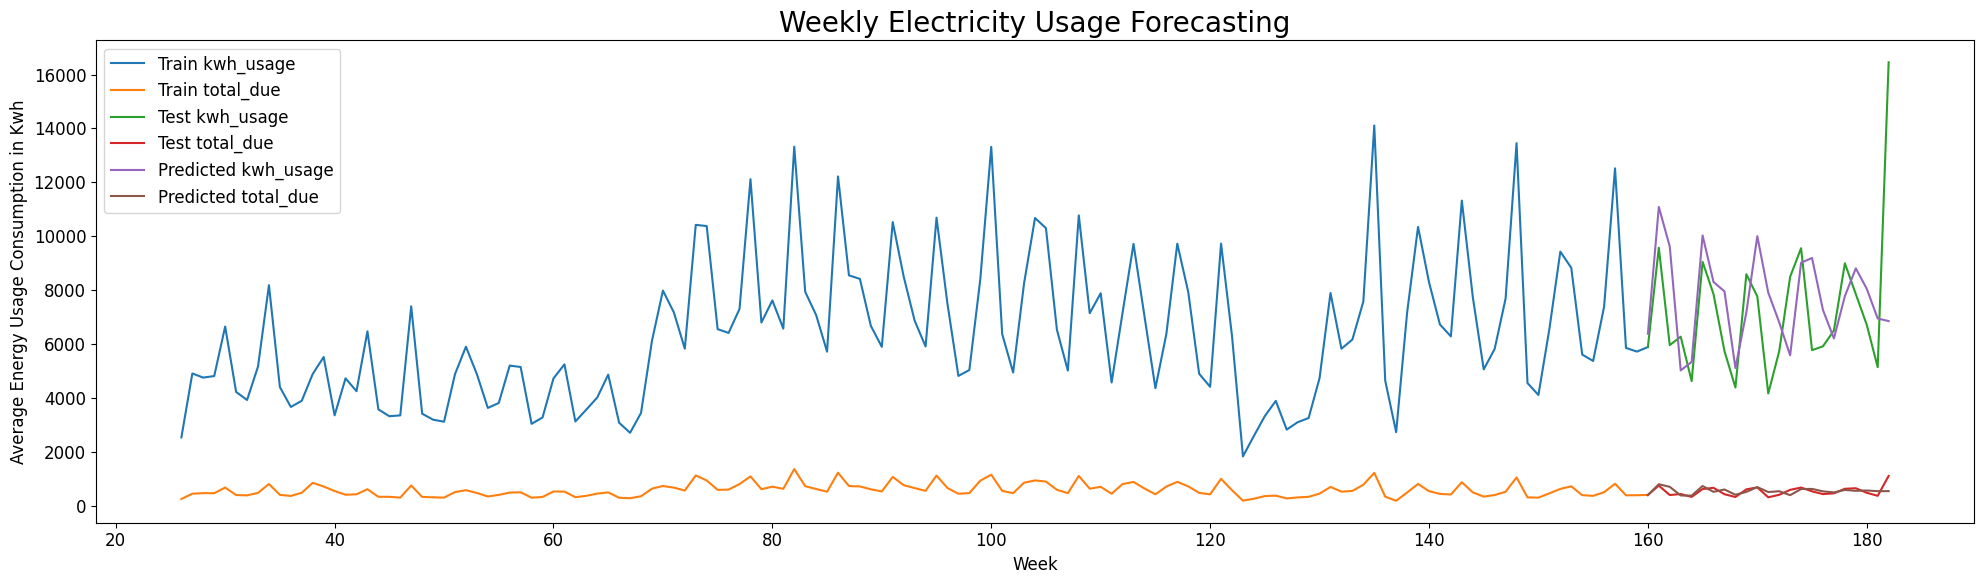

In [43]:
plt.figure(figsize=(20, 6))
plt.plot(train_data['kwh_usage'], label = 'Train kwh_usage')
plt.plot(train_data['total_due'], label = 'Train total_due')
plt.plot(test_data['kwh_usage'], label = 'Test kwh_usage')
plt.plot(test_data['total_due'], label = 'Test total_due')
plt.plot(predictions['kwh_usage'], label = 'Predicted kwh_usage')
plt.plot(predictions['total_due'], label = 'Predicted total_due')

plt.legend(loc='upper left')
plt.title('Weekly Electricity Usage Forecasting', fontsize=20)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Average Energy Usage Consumption in Kwh', fontsize=12)
plt.tight_layout()

In [44]:
# Calculating the root mean squared error
rmse_kwh_usage = math.sqrt(mean_squared_error(predictions['kwh_usage'],test_data['kwh_usage']))
print('Mean value of kwh_usage is : {}. Root Mean Squared Error is :{}'.format(mean(test_data['kwh_usage']), rmse_kwh_usage))

rmse_total_due = math.sqrt(mean_squared_error(predictions['total_due'],test_data['total_due']))
print('Mean value of total_due is : {}. Root Mean Squared Error is :{}'.format(mean(test_data['total_due']), rmse_total_due))

Mean value of kwh_usage is : 7270.807960167654. Root Mean Squared Error is :2706.3394255892267
Mean value of total_due is : 551.2324396222277. Root Mean Squared Error is :169.7645963206738


### LSTM - Long Short Term Memory

In [46]:
lstm_df = data_df[['kwh_usage', 'week']]
lstm_df = lstm_df.groupby('week').mean()
lstm_df.shape, lstm_df.head()

((157, 1),
         kwh_usage
 week             
 26    2550.591241
 27    4920.168111
 28    4767.283350
 29    4825.196879
 30    6660.206659)

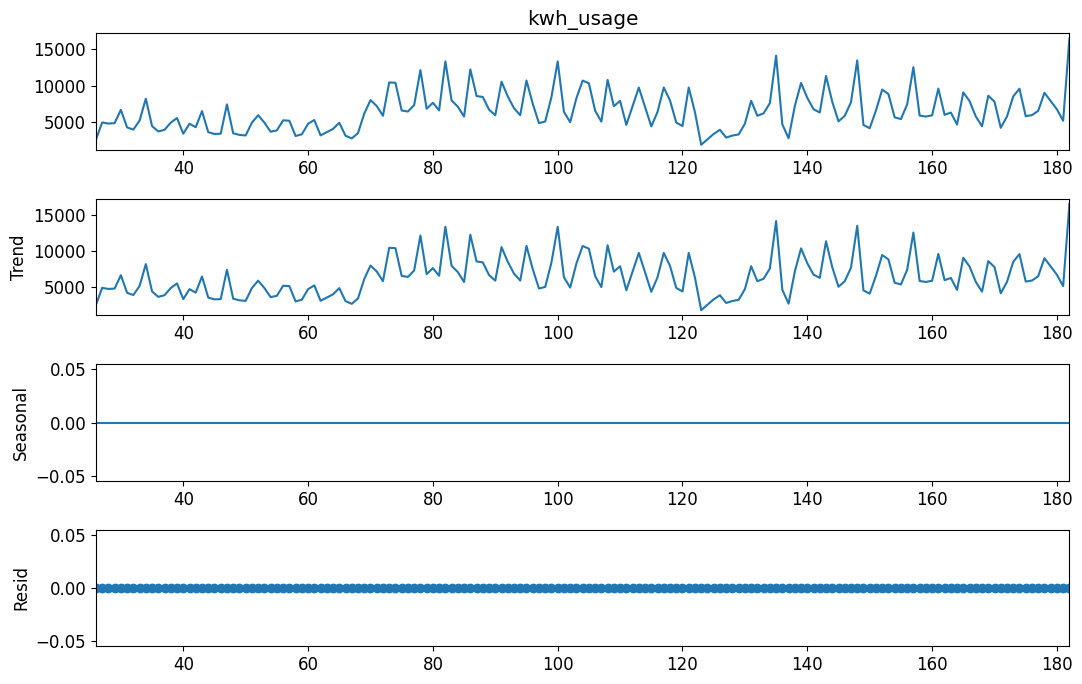

In [48]:
res = seasonal_decompose(lstm_df['kwh_usage'].dropna(), period=1)
fig = res.plot()
fig.set_size_inches((11, 7))
fig.tight_layout()
plt.show()

In [49]:
train_data = lstm_df.loc['0':'160']
test_data = lstm_df.loc['160':]

In [51]:
lstm_df.head(2), lstm_df.tail(2)

(        kwh_usage
 week             
 26    2550.591241
 27    4920.168111,
          kwh_usage
 week              
 181    5154.602378
 182   16454.560694)

In [52]:
scaler = MinMaxScaler()

scaler.fit(train_data)
scaled_train = scaler.transform(train_data)
scaled_test = scaler.transform(test_data)

In [53]:
# define generator - using past 15 values
n_input = 15
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)
     
X,y = generator[0]
print(f'Given Array: \n{X.flatten()}')
print(f'Need to Predict (y): \n {y}')

Given Array: 
[0.05726747 0.25047208 0.23800654 0.24272855 0.39234697 0.19474895
 0.1703378  0.27122726 0.51728633 0.20947108 0.1492983  0.16804037
 0.24900017 0.30026072 0.12396093]
Need to Predict (y): 
 [[0.23582726]]


In [55]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [56]:
# fit model
model.fit(generator, epochs=50)

Epoch 1/50
120/120 [==============================] - 4s 13ms/step - loss: 0.0522
Epoch 2/50
120/120 [==============================] - 1s 9ms/step - loss: 0.0449
Epoch 3/50
120/120 [==============================] - 1s 8ms/step - loss: 0.0439
Epoch 4/50
120/120 [==============================] - 1s 8ms/step - loss: 0.0411
Epoch 5/50
120/120 [==============================] - 1s 12ms/step - loss: 0.0425
Epoch 6/50
120/120 [==============================] - 1s 12ms/step - loss: 0.0411
Epoch 7/50
120/120 [==============================] - 1s 7ms/step - loss: 0.0427
Epoch 8/50
120/120 [==============================] - 1s 8ms/step - loss: 0.0415
Epoch 9/50
120/120 [==============================] - 1s 7ms/step - loss: 0.0401
Epoch 10/50
120/120 [==============================] - 1s 8ms/step - loss: 0.0399
Epoch 11/50
120/120 [==============================] - 1s 7ms/step - loss: 0.0402
Epoch 12/50
120/120 [==============================] - 1s 7ms/step - loss: 0.0396
Epoch 13/50
120/120 [=

Text(0, 0.5, 'Loss')

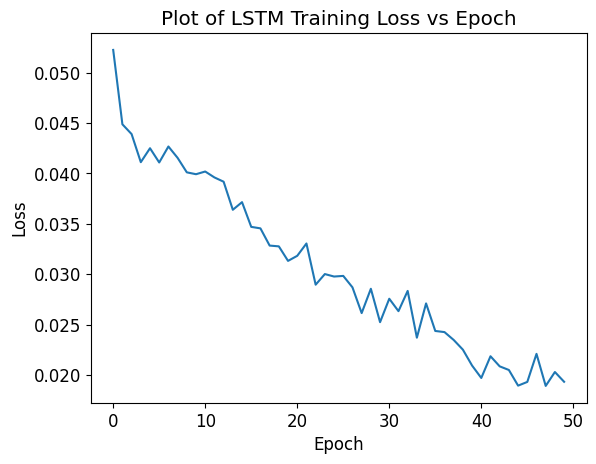

In [57]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

plt.title('Plot of LSTM Training Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [58]:
test_preds = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):
    # get pred value for 1st batch
    current_pred = model.predict(current_batch)[0]
    # add preds into test_predictions[]
    test_preds.append(current_pred) 
    # use pred to update the batch and remove 1st value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 33ms/step


In [60]:
true_predictions = scaler.inverse_transform(test_preds)
test_data['predictions'] = true_predictions

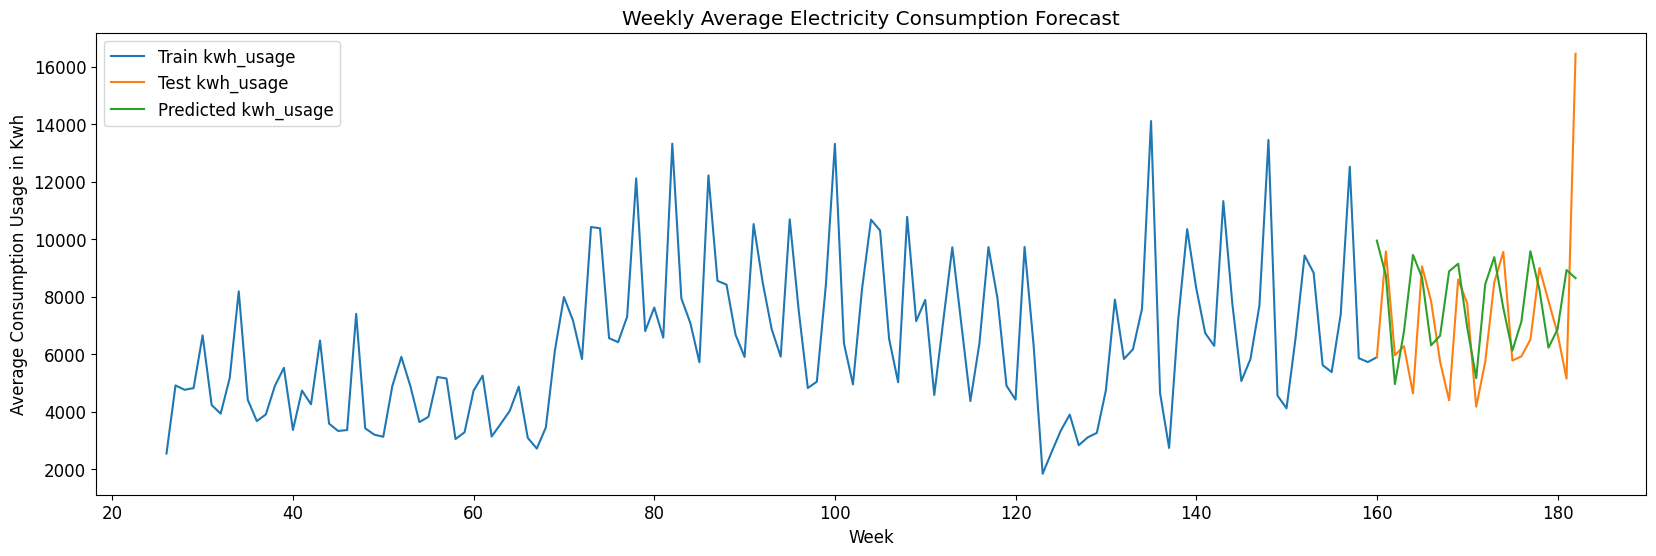

In [61]:
plt.figure(figsize=(20, 6))
plt.plot(train_data, label='Train kwh_usage')
plt.plot(test_data['kwh_usage'], label='Test kwh_usage')
plt.plot(test_data['predictions'], label='Predicted kwh_usage')

plt.legend(loc='upper left')
plt.title('Weekly Average Electricity Consumption Forecast')
plt.xlabel('Week')
plt.ylabel('Average Consumption Usage in Kwh')
plt.show()

In [63]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test_data['kwh_usage'],test_data['predictions']))
print('Root Mean Squared Error of kwh_usage is :{}'.format(rmse))

Root Mean Squared Error of kwh_usage is :2706.4503345080548


### Clustering - Sunil

Models proposed:

1. KMeans - simple and easy model which is computationally efficient. requires the number of clusters to be specified and can be sensitive to initialization of centroids
2. DBSCAN - can handle arbitrary shapes of clusters and noise points. But this model can be quite computationally expensive for big datasets.
3. Hierarchical - can provide hierarchy of clusters which is useful fpr understanding relationships between the clusters. But this model too is computationally expensive.

In [ ]:
data_main = pd.read_csv('Electricity_Usage_Data.csv')

In [ ]:
data_main[['bill_date']] = data_main[['bill_date']].apply(pd.to_datetime)

In [ ]:
data_main.loc[:,'bill_date'] = data_main['bill_date'].apply(lambda x: pd.to_datetime(f'{x.year}-{x.month}-01'))

In [ ]:
address_enc = LabelEncoder()
bill_type_enc = LabelEncoder()

data_main['address_enc'] = address_enc.fit_transform(data_main['service_address'])
data_main['bill_type_enc'] = bill_type_enc.fit_transform(data_main['bill_type'])
data_main['year'] = data_main['bill_date'].apply(lambda x:x.year)
data_main["week"] = data_main.apply(lambda row: row["bill_date"].week+52*(row["year"]-2011) ,axis=1)
data_main['month'] = data_main['bill_date'].apply(lambda x:x.month)

In [ ]:
## Loading the extracted geolocations from saved pickle file
if os.path.isfile("locations.pkl"):
    locations = pickle.load(open("locations.pkl","rb"))
    print("Total Geo Location data extracted by Addresses : ",len(locations.keys()))
else:
    print("Locations not founds, run Extract Geolocations.ipynb")

Total Geo Location data extracted by Addresses :  3442


In [ ]:
data_main["lat"] = data_main["service_address"].apply(lambda x : locations[x][0] \ 
                                                      if x in locations.keys() else locations["Houston"][0])
data_main["lon"] = data_main["service_address"].apply(lambda x : locations[x][1]  \
                                                      if x in locations.keys() else locations["Houston"][1])

In [ ]:
## Remove the rows for which the geo locations are not extraceted, which was assigned to houston city location
data_main = data_main[(data_main["lat"]!='29.7589382')&(data_main["lon"]!='-95.3676974')]

In [ ]:
X = data_main[[
    'business_area', 
    'address_enc', 
    'bill_type_enc', 
    'year', 
    'month',
    'week',
    'kwh_usage',
]]

In [ ]:
X.dtypes

business_area      int64
address_enc        int32
bill_type_enc      int32
year               int64
month              int64
week               int64
kwh_usage        float64
dtype: object

In [ ]:
def calculate_WSS(points, kmax):
    sse = []
    for k in range(10, kmax+1,10):
        kmeans = KMeans(n_clusters = k).fit(points)
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(points)
    
        sse.append(kmeans.inertia_)
        print("sse for kmeans with {} clusters is : {}".format(k,kmeans.inertia_))
    return sse

In [ ]:
sse = calculate_WSS(X.values,100)

sse for kmeans with 10 clusters is : 58267410681664.32
sse for kmeans with 20 clusters is : 12944199129004.955
sse for kmeans with 30 clusters is : 6020451394723.76
sse for kmeans with 40 clusters is : 3440913598796.767
sse for kmeans with 50 clusters is : 2214659637984.169
sse for kmeans with 60 clusters is : 1535920912851.7847
sse for kmeans with 70 clusters is : 1095696134122.1945
sse for kmeans with 80 clusters is : 808177861402.0115
sse for kmeans with 90 clusters is : 638014545319.9745
sse for kmeans with 100 clusters is : 526548423028.7805


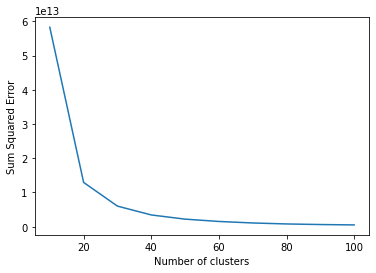

In [ ]:
plt.plot([i for i in range(10,101,10)],sse)
plt.xlabel("Number of clusters")
plt.ylabel("Sum Squared Error")
plt.show()

### From the above plot of sse vs #clusters, by elbow method we can take 40 as the best number of clusters

In [ ]:
## Training the kmeans on best k-value
kmeans = KMeans(n_clusters=40, random_state=0).fit(X)
print("Value Counts of Cluster obtained from kmeans : ",pd.Series(kmeans.labels_).value_counts())

Value Counts of Cluster obtained from kmeans :  27    47879
0     41440
18     6954
32     1815
10      943
38      663
6       340
19      322
29      268
13      184
3       111
34      102
12       75
33       69
30       60
7        38
21       36
16       21
26       21
9        21
17       20
14       19
2        18
25       16
31       13
39       13
23       10
8        10
24       10
35        9
1         8
5         7
11        7
28        5
22        5
20        4
37        4
4         4
15        3
36        1
dtype: int64


In [ ]:
data_main["Cluster"] = kmeans.labels_

In [ ]:
data_main["lat"].value_counts()

28.4220756            628
29.6432364            315
34.901468             306
33.727672             300
29.681557             281
                     ... 
29.72712524161074       1
29.783487               1
29.809849333333332      1
29.840447               1
29.946153               1
Name: lat, Length: 3007, dtype: int64

In [ ]:
fig = px.scatter_mapbox(data_main, lat="lat", lon="lon", hover_name="service_address", \
                        hover_data=["service_address","Cluster","kwh_usage"],color="Cluster", \
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300, \
                        center=dict(lat=29.7, lon=-95.3),)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### The above plot might not able to load because of memory, so a screenshot is provided in the below cells.

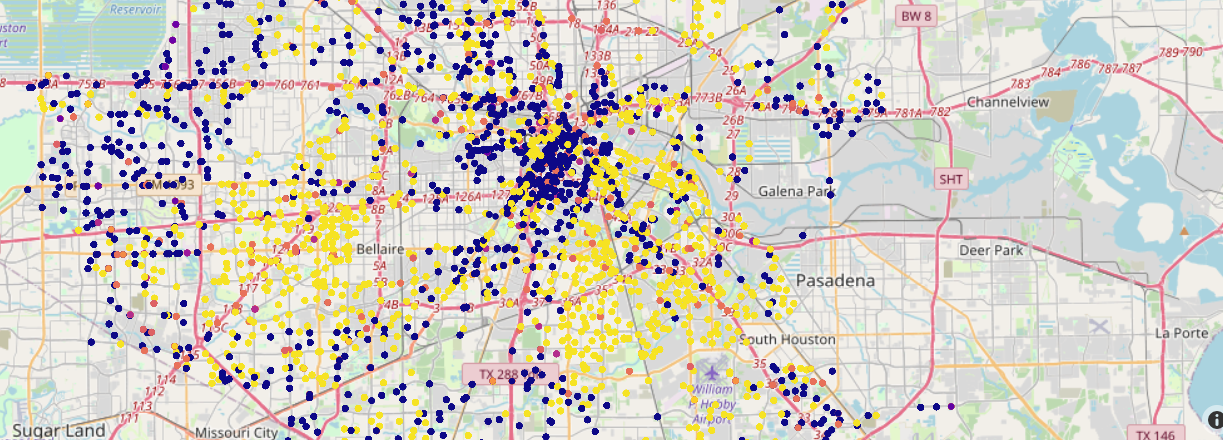

In [ ]:
display.Image("Kmeans2.png")

## DBSCAN

In [ ]:
db = DBSCAN(eps=0.3, min_samples=3)
db.fit(X)

y_pred = db.fit_predict(X)
print("Number of Clusters Obtained from DBSCAN : ",len(set(y_pred)))

Number of Clusters Obtained from DBSCAN :  2


In [ ]:
data_main["DBS Cluster"] = y_pred

In [ ]:
fig = px.scatter_mapbox(data_main, lat="lat", lon="lon", hover_name="service_address", \
                        hover_data=["service_address","DBS Cluster","kwh_usage"], \
                        color="DBS Cluster",color_discrete_sequence=["fuchsia"], \
                        zoom=3, height=300,center=dict(lat=29.7, lon=-95.3),)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

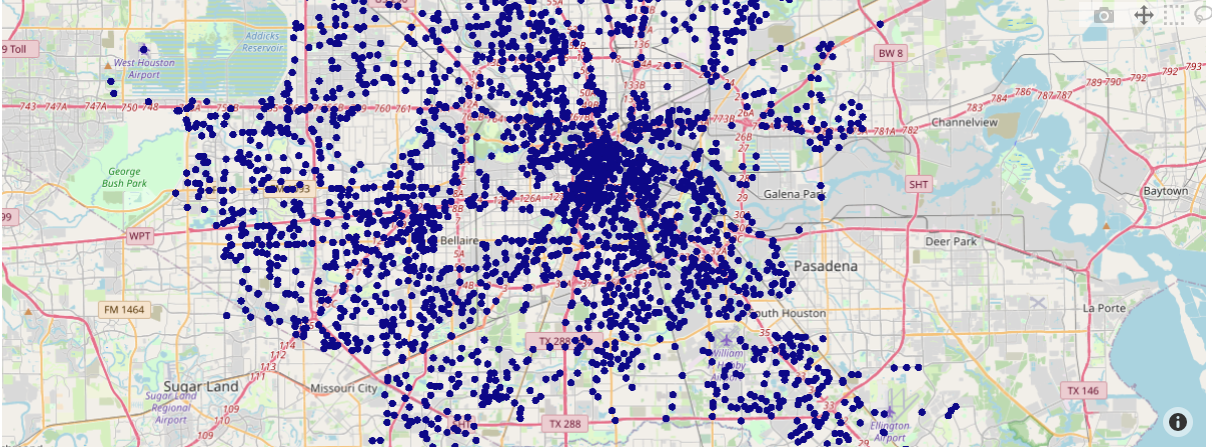

In [ ]:
display.Image("DBSCAN.png")

## Agglomerative Clustering

In [ ]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

In [ ]:
X_principal.shape

(101548, 2)

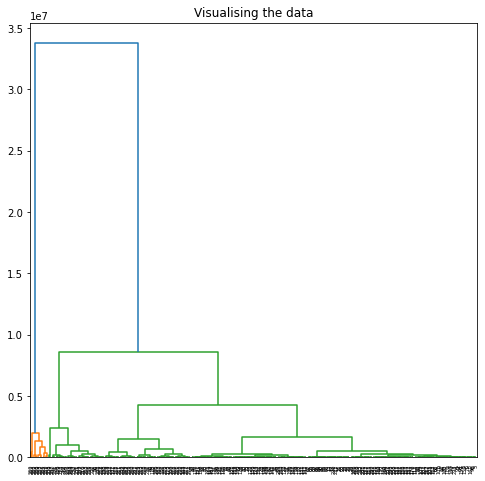

In [ ]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal.iloc[:300], method ='ward')))

- As Agglomerative clustering is highly computational, we have limited the data to 10000 points for this model.
- From the Dendrogram, we can take best number of clusters for the model as 2.

In [ ]:
 ## Reducing number of rows as agglomerative clustering is unable to run on large data
num_points = 10000
clustering = AgglomerativeClustering(n_clusters=2).fit(X.iloc[:num_points])

In [ ]:
data_aggc = data_main.iloc[:num_points]
data_aggc["Aggc Cluster"] = clustering.labels_

C:\Users\sbelde3\AppData\Local\Temp\ipykernel_11176\2663978122.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig = px.scatter_mapbox(data_aggc, lat="lat", lon="lon", hover_name="service_address", \
                        hover_data=["service_address","Aggc Cluster","kwh_usage"], \
                        color="Aggc Cluster", color_discrete_sequence=["fuchsia"], \
                        zoom=3, height=300,center=dict(lat=29.7, lon=-95.3),)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

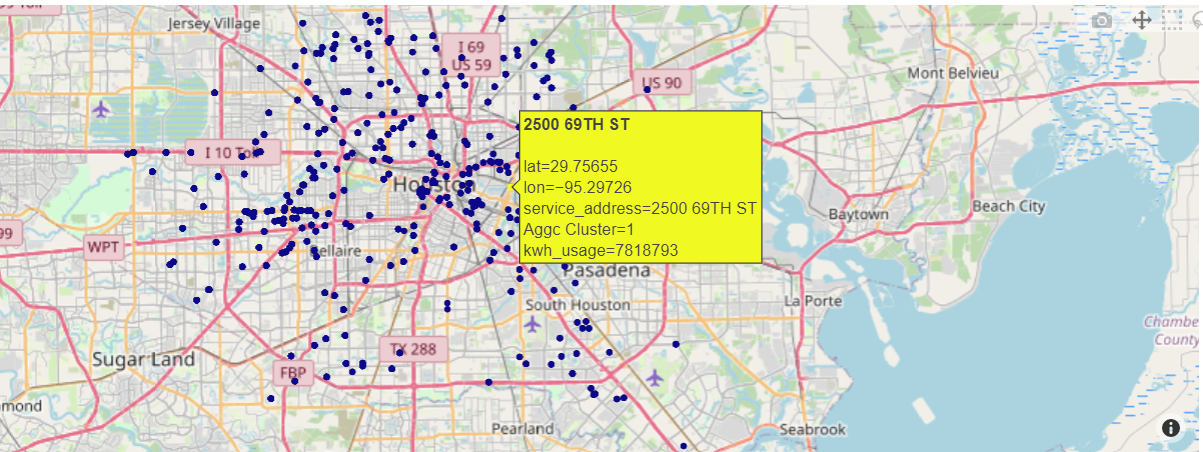

In [ ]:
display.Image("Aggc.png")

## Results

1. The hardest part of the project so far was the initial data cleaning process and making sense of the columns. So far the correlation between the features is still quite low so generating useful insights from these features is proving challenging. 

2. During Summer/Fall months there is quite high usage of energy. As well as there are few business areas where there is more usage of energy. This has been visualized as well.

3. The results so far are preliminary. We need to iterate further on these results and the observations in order to verify the conclusions befere we can confidently say that our observations are indeed correct.

4. The data might prove insufficient for few of the ML tasks that we are planning on performing. Therefore finding another data source which can be combined with these datasets is going to prove difficult in case the need arises.

5. Yes, we believe we are on track with the project. We have a plan to work on the models that have not yet been implemented and we are going to verify the work we have done so far before concluding the work.

6. The data as it stands right now is good as it has been useful to give the insights we have given so far. Once we are able to figure out the time-series and Clustering analysis part as well we would be able to prove that the data is able to forecast as well and cluster high energy needing areas into groups.


## Data Science Questions:
### Previous electricity usage data can be used for predicting the usage for future (Time-Series) - Hyndavi
Perfomed time series analysis using three models - ARIMA, VAR, and LSTM.
* As we have data spread accross 4 financial years, the monthly average energy usage forecasting was poor due to the less amount of data observations, so we had to perform analysis week wise to make the model more robust in predictions. 
* There was no seasonality observed in the data, however we have seen a trend on average usage of electricity. Trained the models with first 160 weeks and rest for test the data to evaluate the performance.
* Based on the metrics, we can say that ARIMA performed better. However, if we have more than one correlated variables then it wouldn't be a good choice as it is a univariate analyser.
* The VAR with the help of VARMAX class was able to enforce the stationary and LSTM model is capable of handling non-stationary data.
* VAR and LSTM provided similar results in terms on error metrics. The results would have been more concrete if we have more amount of data and few other correlated attributes.
* Hence, using time series analysis we are able to predict the usage for future and based on previous consumption usage data.


### Group areas based on their energy consumption (Clustering) - Sunil

Out of all the three clustering models, kmeans performed better. It has clearly differentiated between the clusters and was able to give some conclusions out of geo plotted clusters

#### Kmeans
* The locations with high usage of electricity are located at the center of the city (blue color) and also some have high usage (blue color) far away from the city center this could * *  probably because most industries/factoris are located outside the city which consume more electricity.
*  The sub-urban areas have moderate usage(yellow color) of electricity.
* Very few points have grouped into other than blue or yellow cluster, by viewing each of this points, we have noticed that they are outliers with unsual bill rates and usage.

#### DBSCAN
* As DBSCAN is very sensitive to train and our data is not well suited for the clustering, DBSCAN algorith failed to cluster the data.
* It gave two clusters, one of the clusters have very few points<0.2% which are found to be outliers.

#### Agglomerative Clustering
* The Hierarchial model used gave two clusters, with one of clusters beign completely outliers.


### Electricity usage can be predicted by using correlated features (Regression) - Sourabh
* Used three regression techniques: Linear Regression, Gradient Boosting Regression, and Decision Tree Regression.
* The linear regression was too simple and was not able to capture the correlations within the dataset hence the poor performance on the train as well as test set. This can also be seen in the high RMSE value too.
* Gradient Boosting Regression was able to capture the relationships between the variables but unfortunately it is overfitting as reflected by the R2 score and RMSE value. On the test the R2 score is too low and RMSE is high which indicates overfitting.
* The Decision Tree Regressor gave the best performance of the 3 models. It averages 95% on the train and 90% on the test set (taking into account both the model trained on outlier datset and without outliers).
* Therefore, using regression analysis, we are able to show that electricity usage can be predicted provided we have the features such as area of the connection, the type of the bill (connection taken), the year and month in which the usage is being predicted.



### Classification of bill type can be done using features in the data (Classification) - Sharmisha
* Evaluated the performance of three different classifiers: logistic regression, decision tree classifier, and random forest classifier. The evaluation metrics used are F1 score.

Based on the results, we can see that the logistic regression model has lower F1 scores compared to the other two models. This suggests that the logistic regression model may not be performing as well as the decision tree and random forest models in correctly predicting both positive and negative instances.

The decision tree and random forest models have very high F1 scores and accuracy scores for both the train and test sets. 

For predicting the type of bill, the Decision Tree Classifier and Random Forest Classifier models both performed similarly with an F1-score of 66%. The Logistic Regression model had a lower F1-score of 43%.


## References
1. [sklearn](https://scikit-learn.org/stable/)
2. [pandas](https://pandas.pydata.org/docs/)
3. [scipy](https://docs.scipy.org/doc/scipy/)
4. [data](https://data.world/houston/houston-electricity-bills)